In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm()}

In [2]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/Work/Fermilab2021/HistData/kaon_pn_4GeV_Jun24_ntuple/*.root")

In [3]:
def flat(x,axis=None): # for now must cast while waiting for coffea to catch up
        try:
            return ak.to_numpy(ak.flatten(x,axis=axis)) 
        except:
            return x

In [4]:
hists = {}
hists["lambda_hist_pdg1"] = hist.Hist("Sim Lambda",
                                hist.Bin("pdg", r"Kinetic Energy [MeV]", 80,-300, 2300)
                            )
hists["lambda_hist_pdg2"] = hist.Hist("Sim Lambda",
                                hist.Bin("pdg", r"Kinetic Energy [MeV]", 80, -300, 2300)
                            )




In [5]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)

    sim_kaon = ldmx_events['Sim_Kaon']
    sim_kaon_n = ldmx_events['n']['Sim_Kaon']
    sim_lambda = ldmx_events['Sim_Lambda']
    sim_lambda_dau1 = ldmx_events['Sim_Lambda_dau1']
    sim_lambda_dau2 = ldmx_events['Sim_Lambda_dau2']
    
    lambda0_mass = 1115.683
    kaon_mass = 497.648
    #all lambda are 0 because they are the only light enough
    
    kaone_mask = sim_kaon.e >= 1440
    
    n1_mask = (abs(flat(sim_kaon_n)) == 1)
    kplus_mask = ((flat(sim_kaon[n1_mask].pdgID)) == 321)
    kshort_mask = ((flat(sim_kaon[n1_mask].pdgID)) == 310)
    klong_mask = ((flat(sim_kaon[n1_mask].pdgID)) == 130)
    
    print(flat(sim_lambda.decay))
    print(flat(sim_lambda_dau1.pdgID))

    hists["lambda_hist_pdg1"].fill(
                         pdg=flat(sim_lambda_dau1.pdgID),
                         )   
    hists["lambda_hist_pdg2"].fill(
                         pdg=flat(sim_lambda_dau2.pdgID),
                         )   


In [6]:
nchunk = 0
for chunk in ldmx_dict:
    nchunk += 1
    print('process',nchunk)
    ProcessChunk(chunk, hists)

process 1
[1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 2 1 1 1 2 2 2 2 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 2 1 2 2 2 2 2 1
 1 1 1 2 1 1 2 1 1 2 0 1 2 2 1 1 2 2 2 1 2 1 1 1 1 1 2 1 2 1 1 2 1 2 2 1 1
 2 2 2 1 1 1 2 1 1 2 2 1 1 1 1 2 2 1 1 1 2 1 1 2 1 2 1 1 1 2 1 1 0 1 2 1 1
 2 2 2 1 2 2 2 1 1 2 2 1 1 1 2 1 1 1 2 1 1 2 2 1 1 0 1 2 2 1 1 2 2 1 0 2 0
 2 1 1 2 2 1 2 2 1 0 2 2 2 1 2 1 2 1 2 1 1 2 2 1 2 1 1 2 2 1 1 1 2 1 1 1 1
 1 1 1 2 2 1 1 2 2 2 0 1 1 2 1 0 2 1 2 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 2 1
 1 1 2 1 1 1 0 0 0 1 2 1 1 1 2 1 2 1 1 0 1 1 1 1 0 2 2 1 0 2 2 0 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 2 1 2 1 2 0 2 1 0 1 2 1 1 2 2 1 1 1 1 2]
[2212.  111. 2212.  111. 2212.  111. 2212. 2212.  111.  111. 2212. 2212.
 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111.  111.  111. 2212.
 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212.  111.  111.
  111.  111. 2212. 221

process 4
[1 2 1 2 1 1 2 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 2 1 2 1 2 2 1 0 1 1 1 0 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 1 1 2 1 2 1 1 1 2 2 1 2 1 2 2 2 2 2 1
 1 2 0 1 2 0 1 2 1 2 2 1 0 1 2 2 2 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1 2 2 1 2 1
 1 1 2 1 1 2 1 1 1 1 0 1 0 1 1 2 2 1 2 1 1 0 2 2 0 1 2 1 1 1 1 2 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 1 2 2 0 1
 1 2 1 1 1 1 2 1 1 1 2 1 1 1 0 2 2 1 1 2 1 2 1 1 2 1 2 1 1 1 1 1 1 0 1 1 0
 1 2 1 1 2 1 1 2 1 2 1 1 1 1 1 0 1 1 2 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 0 1 1
 1 1 1 2 2 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 1 2 0 2 1 1 1 1 2 2 1 1 1
 1 1 2 2 1 1 1 2 2 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1]
[2212.  111. 2212.  111. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212.
 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111.
 2212.  111.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2

 2212. 2212.  111. 2212.  111. 2212.]
process 7
[1 1 2 2 1 2 1 1 2 2 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 1 2 1 2 2 1 1 2 1 2 2 1
 1 1 1 2 2 1 1 2 1 1 1 1 2 1 2 1 1 2 2 2 2 1 1 1 1 1 1 1 2 2 2 0 1 1 2 1 1
 2 2 2 1 2 1 1 1 1 1 2 2 2 1 2 1 2 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 0 2 2
 1 1 1 1 1 2 2 2 2 1 1 1 0 1 2 1 1 1 1 2 1 2 2 1 1 1 1 2 0 1 1 1 1 2 2 2 1
 2 1 1 1 1 0 2 1 1 2 1 1 2 1 2 2 1 2 1 2 2 1 1 2 2 1 1 2 2 1 1 1 1 1 1 2 1
 1 1 1 1 0 2 1 2 1 0 2 1 2 1 2 0 1 1 1 1 0 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 2 0 1 1 1 2 2 1
 1 1 1 1 1 1 2 2 2 1 2 1 2 1 1 1 2 2 2 2 1 0 1 1 2 2 2 1 2 1 2 1 1 2 2 2 1
 1 2 2 1 1 1 1 1 2 1 2 1 1 2 2 1 2 1 1 1 1 1 1 2 1 1 1 2 1 2 2 1 2 1 1 1 2
 1 1 2 2 1 1 2 1 1 1 0 1 2 1 1 1 1 2 1 1 1 2 2 1 1 2 2 2 1 1 1 1 2]
[2212. 2212.  111.  111. 2212.  111. 2212. 2212.  111.  111. 2212. 2212.
 2212. 2212. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212.  111.
  111. 2212.  111. 2212.  111.  111. 2212. 2212.  111. 2212.  1

[2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 2 1 2 1 1 2 0 0 1 1 1 1 1 1 1 1 2 2 2
 2 1 1 1 1 2 1 1 2 1 1 0 1 1 2 2 2 0 1 1 2 1 1 1 2 1 1 1 1 2 2 1 1 2 2 2 1
 0 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 0 2 2 1 2 0 2 2 1 1 2 1 2
 1 2 1 2 1 1 1 1 1 0 2 2 1 2 0 2 1 2 2 1 1 1 0 1 1 1 1 1 1 0 1 2 1 0 2 2 1
 0 2 0 2 1 1 2 1 1 2 1 1 1 2 2 2 1 1 1 2 1 1 2 2 1 1 2 1 2 2 1 2 1 0 1 2 2
 1 1 2 1 2 1 0 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1 2 2 2 1 1 2 1 2 1 1 2 2 1 1
 1 1 1 2 2 1 1 1 1 2 1 1 2 2 1 1 1 1 0 1 1 2 1 2 1 1 2 1 2 2 1 1 2 1 2 2 2
 1 2 1 2 1 2 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2 2 1 1 1 1 2 2 1 2 0 2 1 1 2 1 1
 1 1 2 1 2 2 1 1 0 1 2 2 1 1 2 2 2 2 2 1 2 1 2 2 1 1 1 1 2 2 2 1 2 2 2]
[ 111. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212.  111. 2212.  111.  111. 2212.  111. 2212. 2212.  111.
 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111.  111.  111.
 2212. 2212. 2212. 2212.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212.
  111.  111.  111. 2212. 2212.  111.

 2212. 2212.  111.  111. 2212. 2212. 2212.  111. 2212.]
process 15
[1 0 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1
 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 2 1 2 2 2 1 2 2 0 1 1
 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 2 1 1 2 2 1 1 1 1
 0 1 2 1 1 2 2 1 2 1 2 2 1 0 1 1 1 1 1 1 2 2 2 1 1 2 2 2 1 1 0 1 2 1 1 2 1
 1 0 0 1 2 2 1 2 2 2 1 1 2 1 2 2 1 1 1 2 2 2 0 2 1 1 1 2 1 1 1 1 1 1 1 2 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 2
 1 2 2 2 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 0 0 1 2 2 1 1 1 1 1 2 1 2 1 2 1 2
 1 1 1 1 1 1 1 2 1 0 1 1 2 2 2 2 2 1 1 2 1 1 1 1 1 1 1 1 0 1 1 2 1 1 1 2 1
 2 1 1 2 1 1 1 1 2 1 2 1 2 1 2 1 1 2 2 1 0 1 1 1 1 1 1 1 2 1 1 1 2 0 2 2 1
 1 1 2 2 2 1 1 1 2 2 2 1 1 1 1 2 1 1 2 1 1 1 1]
[2212. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.
 2212.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111.
 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212. 221

process 18
[1 2 0 2 1 2 1 1 1 2 1 2 2 2 1 1 2 2 0 0 2 1 1 2 1 2 1 1 2 2 1 2 2 2 2 1 0
 2 2 2 2 2 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 2 2 1 2 0 1 1 1 0 1 1 2 1 0 2 2 2
 1 2 2 1 0 1 1 1 1 1 1 1 0 1 1 2 2 2 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 0 1 2
 2 1 2 1 1 2 1 1 2 0 1 1 1 2 1 1 2 1 0 2 2 1 1 1 1 1 1 2 1 2 2 2 1 1 2 1 1
 2 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 1 0 1 1 1 1 1 1 1 2 1 1 0 2 2 1 2 2 1 1
 1 1 1 1 1 1 2 1 1 1 1 0 1 1 2 2 1 2 2 2 1 1 1 2 1 1 2 1 1 1 2 1 2 1 1 1 1
 0 2 1 1 1 2 1 2 1 1 0 1 2 1 1 1 1 2 2 1 2 1 1 2 1 1 2 1 1 0 1 2 2 0 1 2 1
 1 2 2 1 1 1 1 1 1 2 0 1 2 1 1 2 1 2 1 1 1 1 2 2 1 2 1 1 1 1 1 2 0 1 1 1 1
 2 1 2 1 0 2 1 1 1 1 1 1 2 2 1 1 1 0 1 1 1 2 2 1 1 1 2 2 2 1 1 2 0 1 1 2 1
 1 1 2 1 1 1 1 1 1 2 2 1 2 1 2 1 2 2 1 1 1 2 1 2]
[2212.  111.  111. 2212.  111. 2212. 2212. 2212.  111. 2212.  111.  111.
  111. 2212. 2212.  111.  111.  111. 2212. 2212.  111. 2212.  111. 2212.
 2212.  111.  111. 2212.  111.  111.  111.  111. 2212.  111.  111.  111.
  111.  111. 2212. 2212.  111.  111.  111.  1

 1 1 2 1 1 2 2 1 2 1 2 2 1 2 1]
[2212.  111.  111.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
  111.  111. 2212.  111. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.
 2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.  111. 2212.  111.
  111.  111. 2212.  111. 2212. 2212.  111. 2212. 2212.  111. 2212. 2212.
  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111.
 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111.  111. 2212. 2212.
  111. 2212. 2212. 2212.  111. 2212. 2212.  111. 2212.  111.  111. 2212.
 2212.  111. 2212.  111.  111. 2212.  111. 2212. 2212.  111.  111. 2212.
  111. 2212. 2212. 2212.  111. 2212. 2212.  111.  111.  111. 2212. 2212.
 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212.
 2212. 2212. 2212.  111.  111.  111. 2212.  111. 2212.  111. 2212. 2212.
  111. 2212. 2212.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.
  111. 2212.  111.  111. 2212. 2212.  111.  111. 2212. 2212.  111. 2212.
 2212.  111. 2212. 

process 25
[1 1 1 1 1 1 2 1 1 1 1 2 0 2 1 1 1 1 2 1 1 1 2 1 1 2 1 1 2 2 2 2 1 2 2 2 1
 2 1 1 1 1 0 2 2 1 1 1 1 2 2 1 0 1 2 2 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 2 2 2
 2 1 1 1 1 1 2 1 1 0 1 1 2 1 1 1 0 1 2 1 1 1 2 1 1 1 1 2 1 2 1 0 1 1 2 2 1
 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 2 2 2
 1 1 1 2 2 2 2 1 2 2 0 1 2 1 2 1 2 1 1 0 2 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 2
 1 2 1 2 1 2 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 2 1 1 2 1 2 0 0 2 2 1 1 2 2 2 2 2 2 2 1 1 1 2 1 1 2 1 1 2 1 2 0 1 0 1
 2 1 1 2 2 2 1 2 0 1 2 2 2 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1 0 1 0 1 1 2 2 1 1
 2 2 2 0 1 0 1 1 1 2 1 2 2 1 2 1 2 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 0 1 1 2 2 1 1 1 2 1 1 1 1 2 1 1 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 2
 2 1 2 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1]
[2212. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.  111.
  111. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212. 2212.
  111. 2212. 2212.  111.  111.  111.  111. 2212. 

 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.]
process 28
[0 1 1 0 1 1 1 1 1 1 1 2 2 2 2 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 2 1
 2 1 2 2 1 1 1 1 2 2 1 2 2 1 1 1 2 2 1 1 1 0 1 2 1 1 1 2 2 1 1 1 1 2 1 1 1
 1 1 2 1 1 1 1 2 1 1 2 1 1 2 2 2 1 2 1 2 2 0 1 2 1 2 1 1 1 1 1 1 2 1 1 2 2
 2 1 1 2 1 1 1 1 2 1 1 0 2 1 1 2 1 2 1 1 2 1 2 2 1 0 1 1 2 2 2 1 1 1 1 2 1
 1 2 1 2 1 2 1 2 1 1 0 0 0 2 1 1 2 1 0 1 1 2 0 1 2 2 1 1 1 1 0 1 2 2 1 1 2
 1 0 1 1 1 1 2 1 1 1 2 1 1 0 2 2 1 2 0 1 2 0 2 1 1 1 2 1 1 1 1 2 1 2 1 1 1
 1 1 1 1 2 2 1 2 2 2 2 1 2 1 1 1 0 1 1 1 1 1 1 2 2 2 1 2 1 1 1 1 1 1 2 1 1
 2 2 1 1 1 1 1 2 1 1 2 2 2 2 2 1 1 1 1 1 1 0 1 2 1 2 1 1 1 2 2 1 2 1 2 2 2
 1 1 1 1 1 2 2 1 1 1 2 2 1 1 2 2 1 2 1 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 2 2
 1 2 0 2 2 0 1 1 1 1 0 1 2 2 1 2 1 1 1 1 1 2 1 2 1 2 2 2 1 2 2 2 2 2 1 1]
[2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111.  111.
  111. 2212. 2212.  111.  111.  111. 2212. 2212. 2212.  111. 2212. 2212.
 2212. 2212. 2212. 2212.  

process 31
[2 2 2 1 1 0 2 1 1 2 1 2 1 1 1 2 2 2 2 2 2 0 1 2 2 1 2 1 1 2 1 2 1 1 2 2 0
 1 1 2 1 1 0 1 1 1 2 1 1 1 2 0 1 1 2 0 0 1 1 2 2 2 1 1 2 0 1 2 2 2 1 1 2 0
 1 1 1 1 2 1 0 1 1 2 1 1 1 2 2 2 0 1 0 2 2 1 2 2 1 0 2 1 2 2 1 2 1 2 1 2 1
 0 1 2 1 2 1 0 1 1 1 2 1 1 1 0 2 2 1 1 2 2 0 2 2 1 2 2 1 1 2 1 2 1 2 1 1 2
 0 0 1 1 1 2 1 1 1 1 2 2 1 2 1 1 1 2 2 2 1 1 2 1 1 1 1 0 1 1 1 0 2 2 1 1 1
 2 2 2 1 2 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 2 0 2 1 1 1 1 1 2 1
 2 1 1 1 1 2 1 0 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 2 0 2 1 1
 2 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2 2 2 0 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1
 2 0 2 1 0 2 2 2 1 2 1 1 1 1 1 1 1 1 2 0 0 1 1 1 1 1 1 2 2 2 2 0 1 2 1 1 1
 1 2 2 1 1 2 2 1 2 1 1 2 1 2 1 1 1 2 1 1]
[ 111.  111.  111. 2212. 2212.  111. 2212. 2212.  111. 2212.  111. 2212.
 2212. 2212.  111.  111.  111.  111.  111.  111. 2212.  111.  111. 2212.
  111. 2212. 2212.  111. 2212.  111. 2212. 2212.  111.  111. 2212. 2212.
  111. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212

 2212.]
process 34
[1 2 1 2 2 1 1 1 0 1 1 1 1 1 1 1 2 2 1 1 2 2 1 1 0 0 1 1 2 1 1 1 1 2 1 2 1
 1 1 2 2 1 1 1 1 2 2 1 1 1 2 2 0 2 1 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 0 1 2 1
 2 1 1 2 2 2 1 1 1 0 1 2 2 1 2 1 1 1 1 0 1 2 1 1 2 1 0 1 1 2 2 1 1 1 2 1 1
 1 1 1 2 1 2 1 1 2 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 2 1 2 1
 1 2 1 1 2 1 1 2 2 1 1 1 2 2 1 1 2 1 1 1 2 2 1 2 2 1 1 1 2 1 1 1 1 2 2 2 1
 2 1 1 1 1 1 2 2 2 2 2 2 2 1 1 1 1 1 1 0 1 2 2 2 1 2 1 2 1 1 1 1 1 2 1 1 1
 2 2 1 2 1 1 1 1 2 2 1 2 1 1 1 2 1 1 1 1 1 2 2 2 2 2 1 1 2 1 2 1 2 2 2 1 0
 1 1 1 0 1 1 2 2 1 1 1 1 1 2 1 1 2 2 2 1 2 1 2 1 1 1 1 1 2 2 2 1 1 1 1 1 1
 0 2 1 1 1 1 2 0 2 1 0 1 1 2 1 0 2 2 0 2 2 1 1 1 1 2 2 2 2 2 1 2 1 1 2 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 2 1 1 1 2 1 1 2 2 2]
[2212.  111. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212.  111.  111. 2212. 2212.  111.  111. 2212. 2212. 2212.
 2212.  111. 2212. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212.
  111.  111. 2212. 2212. 22

process 37
[1 2 1 1 2 2 2 1 1 1 2 1 1 1 2 2 1 0 2 1 2 2 1 1 1 0 1 2 1 2 1 1 1 1 1 2 1
 2 2 0 1 1 1 2 0 2 1 1 1 2 2 2 1 2 1 2 1 1 1 2 2 2 1 1 1 0 1 2 1 1 1 2 2 2
 0 0 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 2 1 2 1 1 1 2 1 1 2 1 2 2 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 0 2 1 1 2 2 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 0 1 1
 2 1 1 0 2 1 2 1 1 1 1 0 1 2 2 1 2 1 1 2 1 2 1 2 1 1 1 2 1 2 2 2 2 2 1 1 1
 1 1 1 1 2 0 2 1 2 2 1 2 2 1 2 1 1 2 2 1 0 0 2 1 1 2 1 2 1 1 1 1 1 1 2 1 1
 2 1 2 0 1 1 1 2 1 1 2 0 2 1 0 0 2 1 2 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2
 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 2 1 1 1 2
 1 1 2 2 1 1 2 2 2 1 1 1 1 1 2 1 2 2 1 1 1 2 1 2 1 2 1 1 2 1 2 1 1 1 0 1 1
 1 1 2 1 1 1 1 0]
[2212.  111. 2212. 2212.  111.  111.  111. 2212. 2212. 2212.  111. 2212.
 2212. 2212.  111.  111. 2212.  111. 2212.  111.  111. 2212. 2212. 2212.
 2212.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111.
  

 1 1 1 2 2 1 2 1 1 1 1 2 2 1 2]
[2212. 2212. 2212.  111.  111.  111. 2212.  111. 2212.  111. 2212.  111.
 2212.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111.  111. 2212.
  111.  111.  111. 2212.  111.  111.  111. 2212. 2212.  111. 2212. 2212.
 2212. 2212. 2212. 2212.  111. 2212. 2212.  111.  111. 2212. 2212. 2212.
 2212. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212. 2212.  111.  111.
 2212.  111.  111. 2212.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212.
 2212. 2212.  111. 2212.  111.  111.  111. 2212. 2212.  111.  111. 2212.
 2212.  111.  111.  111. 2212. 2212. 2212.  111. 2212.  111.  111.  111.
 2212.  111. 2212.  111. 2212. 2212.  111.  111. 2212. 2212.  111. 2212.
 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212.
  111.  111. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212.
  111.  111.  111.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 

 2 2]
[2212.  111.  111.  111.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212.
  111. 2212.  111.  111. 2212.  111.  111. 2212.  111.  111. 2212. 2212.
 2212. 2212.  111. 2212. 2212.  111.  111.  111. 2212. 2212. 2212. 2212.
 2212. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
  111.  111. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.
 2212.  111.  111. 2212.  111.  111. 2212. 2212. 2212. 2212.  111. 2212.
 2212. 2212. 2212. 2212. 2212.  111. 2212.  111.  111. 2212. 2212.  111.
 2212. 2212. 2212.  111.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212.
  111.  111. 2212. 2212. 2212.  111.  111.  111. 2212.  111. 2212.  111.
  111. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111.
 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.
  111. 2212.  111. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.  111.
  111. 2212. 2212. 2212. 2212.  111. 2212. 22

process 47
[2 1 1 1 1 0 2 2 0 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 0 2 2 1 1 2 2 1 2 1 1 1
 1 1 2 1 1 1 2 2 2 2 1 1 1 1 1 2 2 1 2 1 1 1 1 2 0 1 1 2 2 2 1 1 2 1 2 2 1
 1 1 1 0 1 2 2 1 1 0 1 1 1 1 1 2 2 2 2 2 0 2 1 2 1 1 1 0 1 1 1 1 2 1 1 1 1
 1 2 1 2 1 1 2 1 1 1 2 1 1 2 0 1 1 2 1 1 1 1 0 1 1 1 2 1 2 2 2 1 2 1 1 1 1
 1 2 1 2 0 1 1 1 2 2 1 1 1 2 1 2 2 1 1 1 1 1 2 1 2 2 1 1 1 2 1 0 1 1 2 1 1
 2 1 1 2 1 1 2 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 0 1 1 2 2 1 1 1 1 1 1 1
 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 2 2 0 2 2 0 1 2 1 2 2 1 2 1 2 2 0 1 2 2 1 1
 2 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 2 2 1 2 2 2 1 2 1 0 2 2 2 1 1 1 2 1 1
 1 2 2 2 2 2 2 2 1 2 2 1 2 1 1 2 1 1 2 2 2 1 2 1 1 1 1 2 1 1 2 1 2 2 2 1 1
 1 1 2 2 1 0 1 2 1 2 2 1 1 1 1 1 1 1 1 1]
[ 111. 2212. 2212. 2212. 2212.  111.  111.  111. 2212. 2212. 2212. 2212.
  111. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.
  111. 2212. 2212.  111.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212.
  111. 2212. 2212. 2212.  111.  111.  111.  111. 2212

 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212.  111.
  111. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.
  111. 2212. 2212.  111.  111. 2212. 2212.  111. 2212.  111. 2212.  111.
  111. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212.
  111.  111. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111. 2212.
  111. 2212. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212.
 2212. 2212.  111. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212.  111. 2212.  111.
  111. 2212. 2212.  111.  111.  111. 2212.  111. 2212. 2212.  111.  111.
 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212.  111. 2212. 2212.  111.
 2212.  111. 2212. 2212.  111. 2212.  111. 2212.  111. 2212. 2212. 2212.
 2212.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.
  111.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.

process 53
[2 1 1 2 1 1 2 1 2 2 1 1 2 2 1 1 1 2 1 1 2 2 2 2 2 2 1 1 1 2 1 1 1 1 2 1 1
 1 1 1 1 1 1 2 1 1 1 1 2 1 2 0 2 2 2 2 2 2 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 0
 2 2 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 2 1 2 2 2 1 2 1 1 2 1 2 2 2 2 2 2 1 2 2 2 2 1 0 2 1 1 1 1 0 1 2 2
 1 2 1 2 2 1 1 1 2 1 1 2 1 2 0 1 2 2 1 2 2 0 0 1 0 1 1 2 1 1 1 1 1 1 2 2 2
 0 2 2 1 1 2 1 1 1 1 1 2 1 1 2 2 2 1 2 1 1 1 2 2 2 1 1 1 2 1 1 0 1 1 1 1 1
 2 1 1 1 1 2 1 2 2 1 2 0 2 1 2 2 1 1 2 1 1 2 1 2 2 1 2 2 1 1 0 0 1 1 1 1 1
 1 1 2 1 1 1 2 2 1 1 2 1 1 1 1 1 1 0 0 2 1 2 1 2 0 1 0 2 2 0 2 1 1 1 1 1 1
 1 2 1 1 2 1 1 1 2 1 1 1 0 0 2 1 1 2 2 2 1 1 0 1 2 1 1 2 1 1 1 0 1 1 2 1 1
 1 2]
[ 111. 2212. 2212.  111. 2212. 2212.  111. 2212.  111.  111. 2212. 2212.
  111.  111. 2212. 2212. 2212.  111. 2212. 2212.  111.  111.  111.  111.
  111.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.  111. 2212.
 2212. 2212. 2

process 56
[2 1 2 1 1 2 1 2 1 2 2 2 1 2 0 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1
 1 2 1 2 0 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 1 1 1 0 2 2 2 2 1 1 1 1 2 1 1 0 2
 1 2 2 0 2 1 1 1 1 2 1 1 2 1 0 1 1 1 2 1 2 1 2 1 2 1 1 2 2 1 2 2 2 1 1 1 1
 1 2 2 1 2 1 2 2 1 0 1 2 1 2 1 2 2 1 1 0 2 1 2 2 1 0 2 1 1 1 1 2 1 1 1 2 1
 1 1 1 2 2 2 1 1 0 1 1 1 1 1 0 1 2 2 1 2 0 1 1 1 1 1 1 1 2 2 1 2 1 2 1 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 2 1 1 1 1 0 1 1 2 1 1 2 2 1 1 2 1 1 1
 1 2 1 2 1 2 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 0
 2 1 1 1 1 2 1 1 1 1 2 1 2 1 2 2 2 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 1 1 1 1 1 2 1 1 1 2 2 1 1 0 1 1 0 2 2 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1
 1 1 1 1 0 1 2 2 1 1 1 1 1 2 2 2 1]
[ 111. 2212.  111. 2212. 2212.  111. 2212.  111. 2212.  111.  111.  111.
 2212.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111.
 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212

 1 1 2 1 1 2 2 1 2 2 2 2 2 1 2 2 1 1 0 0 1 1 1 1 1 2 1 0 1 1 1 1 1]
[2212. 2212.  111. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212.
  111.  111. 2212. 2212.  111.  111. 2212. 2212.  111.  111. 2212. 2212.
 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212.
  111.  111. 2212.  111.  111. 2212. 2212.  111.  111. 2212. 2212. 2212.
 2212.  111.  111.  111.  111. 2212. 2212.  111.  111. 2212. 2212.  111.
  111. 2212.  111. 2212. 2212.  111.  111.  111. 2212. 2212. 2212.  111.
 2212. 2212. 2212.  111. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212.  111. 2212.
 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.
 2212.  111. 2212. 2212.  111. 2212. 2212. 2212.  111.  111.  111.  111.
 2212.  111. 2212.  111. 2212.  111. 2212. 2212. 2212.  111.  111. 2212.
  111.  111.  111. 2212. 2212.  111. 2212. 2212.  111. 2212. 2212. 2212.
  111. 2212. 2212.  111. 2212.  111. 2212.  111. 2212.  

[1 1 2 1 1 1 2 2 2 0 2 1 2 1 1 2 2 2 1 1 1 1 1 2 1 1 1 1 1 2 2 2 1 2 1 1 2
 2 2 1 2 2 1 2 2 0 2 1 2 1 2 1 1 2 1 0 1 2 2 1 1 0 2 1 0 1 2 1 1 2 2 2 1 2
 2 0 1 0 1 2 1 2 2 2 1 1 2 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1
 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1 0 2 1
 1 2 1 1 1 2 1 2 1 1 1 2 1 1 2 1 1 0 0 1 1 1 2 1 1 2 2 2 2 2 2 1 0 1 2 2 2
 2 2 1 1 1 2 2 2 1 1 1 1 0 1 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 0 1 1 2 2 2 1 1
 2 0 1 1 1 2 2 2 2 1 1 1 1 1 2 2 1 1 1 1 1 0 1 0 2 2 2 2 2 2 1 2 1 2 2 2 1
 2 1 2 1 2 2 1 1 1 1 1 0 1 1 1 1 2 1 1 0 1 2 2 2 1 1 1 1 2 1 2 2 1 2 1 2 1
 1 1 1 1 2 1 2 1 1 2 1 1 2 1 1 0 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 1 2 2 0 2 1 2 1 2 2 2 1 1 1 2 1 1 1 1 0 1 1 2 1 1]
[2212. 2212.  111. 2212. 2212. 2212.  111.  111.  111.  111. 2212.  111.
 2212. 2212.  111.  111.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212.
 2212. 2212. 2212. 2212.  111.  111.  111. 2212.  111. 2212. 2212.  111.
  111.  111. 2212.  111.  111. 2212.  111.  111.

[1 1 1 2 2 2 1 2 1 2 0 1 2 1 1 0 0 1 1 1 2 2 1 1 1 2 2 2 1 1 1 2 1 1 1 2 1
 2 1 1 2 1 2 1 1 2 2 2 1 1 2 2 1 2 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 2 1 1 2
 1 1 0 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 2 1 1 2 1 1 2 1
 2 2 1 1 1 1 2 2 1 1 1 1 2 2 1 1 2 2 2 1 2 1 1 1 2 2 2 1 0 1 1 0 1 1 1 1 2
 1 1 1 2 2 2 1 1 2 2 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 2 2 1
 1 2 1 1 1 2 2 2 1 1 2 2 1 0 1 1 1 2 1 0 1 2 0 2 1 1 1 2 1 1 1 1 1 1 2 2 1
 2 2 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 2 2 1 1 2 2 0 2 2 1 1 1 2 1 0 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 0 1 1 1 1 1 2 1 1 1 1 2 1 1 2 2 1 1 1
 1 1 1 2 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 2 1 2 1 2 2 1 2 2 2 1 1 0
 1 2 1 2 2 1 2 1 1 0 1 1 1 1 1 1 1 2 1 1 1]
[2212. 2212. 2212.  111.  111.  111. 2212.  111. 2212.  111. 2212.  111.
 2212. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.  111.  111.
  111. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212.  111. 2212.
 2212.  111. 2212.  111. 2212. 2212.  111.  111.  111. 2212. 2

[1 1 1 1 0 1 2 2 1 1 2 2 2 2 1 1 2 1 1 1 2 1 1 1 2 2 0 2 1 2 1 1 1 2 1 1 1
 1 1 2 2 2 2 1 1 2 1 1 2 1 1 2 1 2 0 1 2 1 1 1 2 2 1 1 2 1 2 1 1 1 1 2 1 2
 2 2 1 1 2 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 2 2 1 1 2 2 1 1 1 1 1 1 0 1 2 2 1
 2 1 1 1 2 1 1 1 0 1 1 1 2 1 2 1 1 2 2 1 1 1 1 1 1 2 2 1 1 1 2 1 2 1 1 1 1
 2 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 1 2 2 2 2 1 1 1 0
 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 2 2 2 2 1 1 2 1 1 1 2
 1 1 1 1 0 1 1 1 1 1 2 1 2 2 2 1 1 2 0 1 1 2 2 0 2 1 1 1 1 1 1 0 2 0 2 1 1
 2 2 1 1 1 2 2 1 1 1 1 2 1 2 2 1 1 1 2 1 1 2 0 1 1 1 1 1 2 2 2 0 0 1 1 1 2
 1 1 1 2 1 1 2 1 2 1 1 1 1 1 2 1 1 2 2 2 1 1 2 1 2 2 2 2 1 1 2 2 1 2 2 1 1
 2 0 2 0 1 0 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 2 0 1 1 1 2 1 2 1 1 2 0 1]
[2212. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212.  111.  111.  111.
  111. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111.
  111.  111. 2212.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.
 2212.  111.  111.  111.  111. 2212.

process 73
[1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 1 2 2 1 1 2 1 2 1 1 2 1 1 1 2 2 1 1 1 1 1 1
 0 0 1 1 2 1 1 2 1 1 2 1 2 1 2 1 2 2 1 1 0 1 2 0 2 1 1 1 1 1 1 2 2 2 1 1 2
 1 1 2 2 1 1 1 1 2 1 1 0 2 0 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 2 1 0 2 0 2
 1 1 1 1 1 2 1 2 2 0 1 2 1 2 1 0 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 2 2 1 1 1 2
 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 2 2 2 2 2 1 1 2 1 1 2 2 2 2 2 1 1 2 2 0
 2 1 1 1 1 2 0 1 2 1 1 1 2 1 1 1 1 2 1 1 2 1 2 1 2 2 0 1 0 2 2 1 1 1 2 1 2
 1 1 1 2 1 2 1 2 1 1 2 2 1 2 2 2 1 2 2 2 2 2 2 2 1 1 2 2 2 1 0 1 1 1 1 1 2
 1 1 1 2 2 2 1 1 2 1 2 1 2 1 1 2 1 1 1 1 0 2 1 2 1 2 1 1 1 1 1 2 2 2 1 1 2
 1 2 1 2 1 2 2 2 0 1 1 2 1 1 2 0 0 0 1 1 2 1 1 1 2 1 2 2 1 2 2 2 1 1 1 2 1
 1 0 2 1 1 1 2 1 1 1]
[2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.
 2212. 2212.  111. 2212.  111.  111. 2212. 2212.  111. 2212.  111. 2212.
 2212.  111. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212.  111. 2212. 2212.  111. 2212. 2212.  111. 2212.  111.


process 77
[2 2 2 1 1 1 2 1 2 1 0 2 2 1 0 2 1 2 1 1 2 2 1 1 1 2 1 1 1 2 2 1 1 2 1 2 1
 1 1 1 2 0 1 1 1 1 0 1 2 2 1 2 1 1 1 2 2 1 1 2 2 0 1 1 2 1 1 1 2 2 1 2 1 1
 1 1 1 2 1 2 2 2 2 1 1 1 2 1 1 1 1 2 2 1 1 2 2 1 0 1 1 2 2 1 2 1 2 1 2 1 1
 0 0 1 0 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 2 0 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1
 1 1 2 1 2 2 1 1 1 1 1 2 2 1 1 2 1 1 2 0 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 2 2
 0 1 2 2 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 2 1 2 2 2 1 1 1 1 1 1 2 1 0 2 2 2 2
 2 2 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 0 2 1 2 1 1 1 2 2 0 1 1 1
 1 1 1 1 1 2 1 2 1 1 2 1 2 2 0 2 1 1 2 1 0 2 1 2 1 1 0 1 2 1 1 0 1 1 2 2 0
 2 1 1 2 1 1 1 1 1 2 2 1 2 1 2 1 2 2 1 1 2 2 1 2 1 1 1 2 1 1 2 2 1 1 1 2 1
 1 1 2 1 1 1 2 1 0 1 1 1 1 1 2 2 2 2 0 1 2 1 2 1 1 2 1 1 1 1 1 2 1 2 1 1 2
 1 1 2 1 2 1 1 1 2 1 2 1 2 0 1 1]
[ 111.  111.  111. 2212. 2212. 2212.  111. 2212.  111. 2212.  111.  111.
 2212.  111. 2212.  111. 2212. 2212.  111.  111. 2212. 2212. 2212.  111.
 2212. 2212. 2212.  111.  111. 2212. 2212.  111. 2212.  111

process 81
[1 2 1 2 2 1 1 1 2 1 1 0 1 1 2 1 0 1 2 1 1 1 1 1 2 1 2 1 2 1 2 1 2 0 2 1 2
 1 2 1 2 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 2 0 0 1
 1 2 1 1 2 1 2 2 1 2 1 2 0 1 2 1 1 1 2 1 1 1 1 2 2 2 1 0 2 1 2 2 2 2 1 1 1
 1 1 1 0 2 1 2 1 1 2 1 0 1 1 2 2 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 2 0 1 1 1
 2 2 2 2 2 1 2 1 1 0 1 1 2 2 2 1 1 1 1 1 1 2 2 2 1 2 1 1 1 1 2 1 2 1 2 1 1
 1 2 1 1 2 1 2 1 2 2 2 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 2 1 1 1 1 1
 2 1 1 2 2 0 2 1 1 2 2 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 2 1 2 2 1 2 0 1 2 0 2
 2 1 1 1 0 0 2 2 2 1 1 1 1 2 1 1 1 1 2 1 2 2 2 1 1 1 1 1 1 2 1 1 2 2 2 2 0
 1 1 1 1 2 1 1 1 2 1 1 2 2 1 0 2 1 2 2 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 1
 0 1 1 2 1 1 1 2 2 1 2 0 1 2 2 1 1 2 1 0 0 1 2 2 1 1 2 1 2 1 1 1 1 2 2 2 1
 1 1 1 2 1 1 1 1 2 1 2 2 2 1 2 1 1 1 2 2 1 1 2 1 1 2 2 0 1 1 1 1 2]
[2212.  111. 2212.  111.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212.
 2212.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212.
  111. 2212.  111. 2212. 

process 84
[1 2 2 1 1 1 2 1 2 0 1 1 2 1 2 1 1 2 2 1 1 1 2 1 1 1 1 1 1 0 2 1 0 1 2 1 1
 1 1 2 1 2 1 1 1 2 1 1 1 1 0 1 2 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 2 1 2 2 2 1
 1 2 2 1 1 1 2 1 2 1 1 1 2 1 1 1 2 0 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 2 2
 2 2 2 2 1 1 1 2 2 1 1 2 1 1 2 1 2 1 2 1 2 1 1 1 1 2 1 1 1 2 2 1 1 1 1 0 2
 1 1 1 1 2 0 1 2 2 1 0 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 1 0 0
 0 1 1 1 1 1 2 2 1 1 2 1 1 2 1 2 2 1 1 2 1 1 2 1 2 2 1 1 1 1 1 1 2 2 0 2 2
 2 2 2 2 1 1 1 2 2 1 2 1 1 1 2 1 1 2 2 1 0 1 0 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 2 1 2 2 2 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 0 2 1 2 1 2 1 1 2 2 2 0 1 1
 2 0 2 1 1 1 0 1 0 0 2 2 2 1 2 2 1 1 2 2 1 2 1 2 1 1 1 1 2 2 2 1 1 2 0 1 1
 0 2 1 2 1 1 2 1 1 1 2 1 2 2 1 1 1 0 1 1 1 2 1 1 1 1 0 1 2 1 1]
[2212.  111.  111. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212.  111.
 2212.  111. 2212. 2212.  111.  111. 2212. 2212. 2212.  111. 2212. 2212.
 2212. 2212. 2212. 2212.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212.
  111. 2212.  111. 2212. 2212. 

process 87
[1 2 2 1 2 2 2 1 1 2 1 2 1 1 1 2 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2
 1 2 2 1 1 1 1 2 2 2 1 1 2 2 2 0 1 1 1 1 1 1 2 1 0 1 1 0 1 1 2 1 2 2 1 1 2
 1 1 1 1 1 1 1 1 2 1 2 0 1 1 1 0 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1
 1 1 2 2 1 1 0 2 2 2 0 1 2 1 1 1 2 1 2 1 0 1 1 1 1 2 1 1 2 1 0 1 1 2 1 1 2
 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 0 1 1 1 1 1 2 2 1 1 0 1 1 0 2 2 1 1 2 1 1
 1 1 1 0 2 2 2 1 0 2 1 1 1 2 2 1 1 1 1 1 1 2 1 0 1 1 2 1 1 1 2 1 1 1 2 2 2
 1 1 2 1 2 1 1 1 2 0 2 2 1 1 2 2 1 1 2 2 1 1 1 2 2 0 0 2 1 1 2 2 2 2 1 2 1
 1 1 2 1 2 1 1 2 1 1 2 1 1 1 1 1 0 1 1 2 2 2 1 2 2 1 1 1 0 1 1 1 1 2 2 0 2
 1 1 2 2 1 1 1 1 1 1 1 0 2 1 2 1 2 2 2 1 1 2 2 0 2 1 1 1 2 2 0 0 1 2 1 0 2
 1 1 1 0 1 1 1 1 1 2 2 2 1 1 1 1 1 1 2 1 1 0 1 1 1 1 2 1]
[2212.  111.  111. 2212.  111.  111.  111. 2212. 2212.  111. 2212.  111.
 2212. 2212. 2212.  111. 2212. 2212.  111. 2212. 2212.  111. 2212. 2212.
  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.
  111. 2212.  111.  111. 2212. 2212. 

[1 1 2 1 1 2 1 1 2 1 0 1 1 1 2 1 1 2 1 1 1 1 1 2 2 2 2 0 1 2 1 2 2 0 1 1 1
 1 2 2 2 2 1 1 2 2 1 2 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 2 1 2 2 0 1 0 2 1 1
 2 1 2 2 2 0 2 1 1 1 1 2 1 2 1 2 2 1 1 1 1 2 1 2 1 1 1 2 1 2 2 2 2 2 2 1 1
 1 2 1 1 1 1 2 1 1 2 2 2 2 2 1 1 1 2 2 2 0 1 0 1 2 2 1 1 1 1 1 0 1 1 1 1 2
 1 2 0 1 1 1 2 2 1 1 2 1 1 1 1 2 1 1 2 2 1 1 2 1 1 1 0 2 2 1 1 1 2 2 1 2 1
 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0 1
 1 1 1 1 2 2 1 1 1 2 2 2 1 2 1 2 1 1 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 2 1 0 0
 1 1 2 1 1 1 1 1 2 1 2 0 1 2 1 1 1 1 0 1 1 2 1 1 2 1 1 1 2 2 2 2 2 0 1 1 1
 1 1 1 1 2 1 1 1 1 2 2 1 2 2 2 0 1 2 1 1 0 1 1 1 1 2 2 1 1 2 1 1 1 1 2 1 2
 2 0 2 2 2 1 1 1 1 1 1 1 2 1 1 2 1 0 1 1 1 1 1 1 2 1 1 2 2 2 2 2 1 2 1]
[2212. 2212.  111. 2212. 2212.  111. 2212. 2212.  111. 2212. 2212. 2212.
 2212.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.  111.
  111.  111. 2212.  111. 2212.  111.  111. 2212. 2212. 2212. 2212.  111.
  111.  111.  111. 2212. 2212.  11

[1 1 1 2 2 2 1 2 2 2 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 2 2 0 1
 2 1 0 2 1 1 2 2 1 1 2 1 1 2 1 1 1 1 1 2 2 1 0 2 2 2 2 1 2 1 1 2 1 1 1 2 2
 1 2 2 1 0 2 1 1 2 0 1 0 1 1 2 1 2 1 2 1 1 1 2 1 1 2 2 1 2 1 1 1 1 1 1 1 1
 2 2 1 1 1 1 2 2 2 2 2 1 1 1 2 1 2 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 2 2 2 1 1
 2 0 1 1 1 2 0 1 1 2 1 1 1 2 2 1 2 1 1 1 1 1 2 1 2 1 1 1 2 1 1 2 1 1 1 1 2
 2 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 2 1 2 2 2 1 2 2 1 2 1 2 0 2 1 2 1 2 1 1 1
 1 1 1 1 2 1 1 2 1 1 1 2 1 2 1 1 1 2 1 2 2 2 2 2 1 2 2 2 2 2 1 1 2 2 1 1 1
 2 1 0 1 1 2 1 2 1 2 2 2 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 2 1
 1 1 2 0 2 2 2 2 2 1 1 1 1 2 1 1 0 2 0 1 1 1 2 2 2 1 1 2 2 2 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 2 1 1 1 1 1 2
 1 1 1 1 2 2 1 2]
[2212. 2212. 2212.  111.  111.  111. 2212.  111.  111.  111.  111. 2212.
 2212.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
 2212.  111. 2212.  111. 2212. 2212. 2212.  111. 2212.  111.  111. 2212.
  111. 2212. 

 2 2 1 1 1 1 0 1 1 1 2 1 2 1 0 2 1 1 1 2 1]
[ 111. 2212. 2212. 2212. 2212.  111. 2212.  111.  111. 2212.  111.  111.
 2212.  111. 2212.  111. 2212.  111. 2212.  111. 2212. 2212.  111.  111.
 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212.  111.
 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212.  111.
 2212.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.
 2212. 2212.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.
  111.  111. 2212. 2212. 2212.  111.  111. 2212.  111.  111.  111. 2212.
  111. 2212.  111. 2212.  111. 2212.  111. 2212.  111. 2212. 2212. 2212.
  111.  111. 2212.  111.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212.
 2212.  111.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212.
  111.  111.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212.
 2212. 2212.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.
 2212.  111.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
  111. 

 2 1 1 1 1 2 2 1 1 2 1 1 1 1 2 1 1 1 2 2 1 1 2 1 2]
[ 111.  111. 2212.  111. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.
 2212. 2212. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212.  111.
 2212. 2212. 2212.  111. 2212. 2212. 2212.  111.  111.  111. 2212. 2212.
 2212.  111.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212.
 2212. 2212.  111. 2212.  111. 2212. 2212.  111.  111.  111. 2212.  111.
 2212. 2212. 2212.  111. 2212.  111.  111.  111.  111. 2212.  111. 2212.
 2212.  111.  111. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212.
 2212.  111.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111.
 2212. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
 2212.  111.  111.  111.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212.
 2212.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111. 2212.  111.
 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.  111.  111.  111.

 1 2 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 2 1 1]
[ 111. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212.
  111.  111.  111.  111. 2212. 2212. 2212.  111. 2212.  111.  111. 2212.
 2212. 2212. 2212.  111.  111. 2212. 2212.  111. 2212. 2212.  111.  111.
 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.  111. 2212.  111.
 2212. 2212. 2212.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212.
  111.  111.  111. 2212.  111.  111.  111. 2212. 2212. 2212. 2212.  111.
  111. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.
 2212.  111.  111.  111.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212.
 2212. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212.  111.
 2212. 2212.  111. 2212. 2212.  111.  111.  111. 2212.  111. 2212.  111.
 2212. 2212. 2212. 2212.  111. 2212. 2212.  111. 2212. 2212.  111.  111.
 22

process 107
[1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 0 2 1 1 1 1 1 1 1 2 1 0 1 1 1 1 2 2
 2 1 2 1 2 1 2 1 2 2 2 2 1 1 2 2 2 1 1 2 1 2 2 2 1 0 2 2 2 2 1 1 1 2 2 1 0
 2 1 1 2 2 2 2 2 2 1 2 0 1 1 1 2 1 2 2 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 2 2
 1 1 1 2 1 1 1 1 0 1 2 1 1 2 2 2 1 1 1 1 1 2 2 1 2 1 0 2 1 2 1 2 2 2 1 1 1
 1 1 1 0 1 0 1 1 1 2 2 2 1 2 1 2 1 2 2 2 2 1 1 1 2 1 1 1 1 0 1 2 2 2 0 1 1
 1 1 1 1 1 1 1 2 1 1 2 2 2 1 2 1 1 1 1 1 2 2 1 1 2 2 1 2 2 0 1 1 1 2 2 2 1
 1 2 1 2 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 0 2 1 1 2 1 2 2 1 2
 1 1 1 2 1 2 2 1 2 2 1 1 2 1 1 1 2 2 2 2 1 2 1 1 1 1 1 2 1 1 1 1 2 2 1 2 2
 1 1 0 2 2 0 1 1 1 1 2 1 1 1 2 0 0 1 2 1 2 1 1 1 2 1 0 1 1 1 1 2 1 2 2 2 1
 1 2 2 1 0 2 1 1 1 1 1 0 0 1 1 1 1 2]
[2212.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212.  111.  111.  111.  111.  111.  111. 2212. 2212. 2212. 2212.
 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.  111.  111.
 2212.  111. 2212.  111. 2212.  111. 2212.  111.  111.  

 1 1 1 2 1 0 1 1 1 2 2 2 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 0]
[2212.  111. 2212. 2212. 2212. 2212. 2212.  111.  111.  111.  111. 2212.
 2212.  111. 2212. 2212.  111. 2212. 2212.  111. 2212.  111. 2212. 2212.
 2212.  111.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.
 2212. 2212. 2212. 2212. 2212.  111.  111. 2212.  111. 2212.  111. 2212.
  111.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.  111.
 2212. 2212. 2212. 2212.  111.  111.  111.  111.  111.  111.  111. 2212.
 2212.  111. 2212. 2212.  111. 2212. 2212.  111.  111. 2212. 2212. 2212.
 2212. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212.  111. 2212.  111.
  111. 2212.  111.  111.  111.  111.  111.  111. 2212. 2212. 2212. 2212.
  111. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212.  111.  111.
 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.
  111.  111. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212.  111.  111. 2212.  111. 2212.  111. 2

 1 2 1 1 1 1 1 0 2 2 1 1 2]
[2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212.  111.  111. 2212.
 2212. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.  111.  111.
 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212.
 2212. 2212. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212.
 2212. 2212.  111. 2212.  111. 2212. 2212.  111. 2212.  111. 2212.  111.
  111.  111.  111.  111.  111. 2212. 2212.  111. 2212.  111.  111. 2212.
 2212. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212.  111.
  111. 2212. 2212.  111. 2212.  111.  111.  111. 2212. 2212.  111. 2212.
 2212. 2212.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212.
  111. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.  111.
 2212.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.  111.
 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212.  111.  111. 2212.  111.
  111. 2212. 2212. 2212

 2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212.]
process 119
[2 1 2 1 1 1 1 1 2 1 1 1 2 2 1 2 1 1 1 1 2 1 1 2 1 1 1 1 2 2 2 1 1 2 2 1 1
 2 2 1 1 1 2 1 2 2 2 2 1 1 1 2 1 1 1 2 2 2 1 2 1 1 0 1 1 1 1 1 1 2 1 1 1 1
 2 2 2 0 1 2 2 1 1 2 2 2 1 2 1 1 1 2 2 1 1 1 2 1 2 2 0 0 2 1 1 1 1 2 1 1 2
 1 0 2 1 1 1 2 0 1 1 2 0 0 0 2 1 2 2 1 1 1 2 2 1 1 2 2 1 1 1 0 2 2 1 2 1 1
 1 1 0 1 2 1 1 1 1 2 1 0 2 1 1 1 2 1 1 1 2 2 2 1 1 1 1 2 1 2 2 1 2 1 2 2 1
 1 1 1 0 1 2 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 2 1 2 1 1 2 2 2 1
 1 1 1 0 2 2 0 1 1 1 0 1 1 2 1 2 2 2 2 1 2 2 2 1 1 1 1 2 2 2 1 0 1 2 0 1 1
 2 1 1 2 2 2 1 2 2 1 1 0 1 1 1 2 2 1 1 1 1 2 0 2 1 1 2 2 2 1 2 1 1 1 1 1 2
 2 1 0 1 2 2 1 2 1 2 1 1 2 1 2 1 1 2 1 2 1 2 1 1 2 2 2 2 1 1 2 2 1 2 1 1 2
 1 1 2 2 1 0 1 0 2 2 2 1 1 1 1 1 1 1 2 2 0 0 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1
 2 1 1 2]
[ 111. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.
  111.  111. 2212.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212.  111.
 2212. 2

process 122
[2 1 0 2 1 1 2 2 1 1 1 1 1 1 1 1 1 0 1 1 0 2 2 1 2 1 1 1 1 1 2 0 1 2 1 2 1
 1 1 1 2 2 2 2 0 1 1 2 1 1 1 2 1 2 2 1 1 1 2 1 1 0 1 2 1 2 1 2 0 0 2 1 1 1
 2 1 1 2 1 2 1 1 0 1 1 2 2 1 1 2 2 1 1 1 0 0 2 1 2 1 1 2 1 0 2 1 2 2 1 2 1
 2 2 1 2 1 1 1 1 0 1 2 2 2 2 2 1 2 1 1 1 1 2 1 2 1 2 1 1 1 2 1 2 1 1 2 1 1
 1 2 1 1 1 0 1 1 1 1 0 2 1 2 2 2 1 1 1 1 2 1 2 2 2 1 2 2 1 0 2 1 2 1 2 2 1
 2 2 2 2 1 1 2 1 2 1 1 2 2 1 1 1 1 2 1 1 1 1 1 2 2 2 2 1 2 1 1 2 2 1 1 0 1
 1 2 2 1 1 2 2 1 1 0 2 1 1 0 1 1 1 1 1 2 1 1 1 0 1 1 0 1 2 1 1 1 1 1 1 1 2
 1 1 0 2 1 0 2 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 1 1 1 1 2 1 2 1 2 1 1 2 1 1
 1 1 2 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 1 1 1 1 2 1 2 1 0 1 1 1 1 0 2 1 2 1
 2 2 1 1 1 2 1 1 2 2 1 2 1 1 1 2 1 2 1 1 2 1 1 1 1]
[ 111. 2212.  111. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212. 2212. 2212.  111.  111. 2212.  111. 2212. 2212.
 2212. 2212. 2212.  111. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212.
  111.  111.  111.  111. 2212. 2212.  111.

[0 1 2 2 2 2 2 1 2 2 2 1 2 1 1 2 2 1 2 1 1 2 0 2 2 1 2 2 1 2 1 1 1 1 2 1 1
 2 1 1 1 2 1 1 1 2 1 0 1 1 1 1 2 1 1 1 1 1 2 2 2 1 1 1 1 2 1 2 2 2 1 2 1 0
 2 2 2 1 1 1 2 2 1 1 2 1 2 1 1 2 1 1 1 0 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1
 1 1 2 1 1 1 0 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 2 1 2 1 2 2 2 1 1 1 1 1 1 1 2 1 0 1 1 2 1 1 2 0 1 0 2 1 2 1 1 2
 1 1 2 1 1 2 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 0 2
 1 1 1 1 1 2 1 2 2 1 1 0 1 1 1 1 2 0 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1
 2 1 1 1 0 2 1 1 2 2 2 2 1 2 0 2 1 1 2 2 1 2 2 0 2 1 2 1 2 2 1 1 2 0 2 1 1
 1 2 1 1 2 2 1 1 1 2 2 1 2 0 0 1 1 1 2 2 2 2 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1
 2 1 1 2 1 1 1 1 2 1 2 0 1 0 1 1 1 2 1 1 2 1 1 1 2 2 2 1 1 2 2 2 1 1 0 1 1
 2 1 1 1]
[2212.  111.  111.  111.  111.  111. 2212.  111.  111.  111. 2212.  111.
 2212. 2212.  111.  111. 2212.  111. 2212. 2212.  111.  111.  111. 2212.
  111.  111. 2212.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212.  111.
 2212. 2212. 2212.  1

process 128
[2 2 1 1 1 2 1 1 1 2 2 1 1 1 1 1 0 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 2 2 1 0 2 1 1 1 1 2 2 1 1 1 0 2 1 2 1 1 2 1 0 1 1 1 1 1 2 2 1 1 1 2 1 1 1
 1 1 1 1 2 1 1 2 1 2 2 1 1 1 2 1 1 2 2 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 2 2 1 2 2 1 0 2 1 1 1 2 2 1 0 2 1 1 1 2 2 1 2 1 2 1 2 1 1 1 2 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 1 2 1 1 1 1 2 2 2 1 2 1 1 1 2 1 1
 2 2 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 0 1 2 1 1 1 2 1 0 1 1 1 2 2 2 1 0 2 1 2
 2 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 0 1 1 1 1 2 1 2 0 2 1 0 1 1 2 2
 1 1 1 2 2 1 2 2 0 1 1 1 2 1 2 2 1 1 2 1 2 1 1 1 0 2 2 1 1 2 1 1 1 1 1 2 0
 1 1 1 1 0 1 1 1 0 2 1 1 2 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 2 2 1 1 0 0
 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 0 2 2 2 1 2 1 1 1 1 2 1 2 1 1 1 1 2 1
 1 1 2 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 2 0 1 1 2 2 1 2 1 1 1 2 2 1 1 0 1 2 1
 0 0 1 1 2 1 1 2 1 1 1 1 1 2 1 2 1 2 1 2 1 2 2 1]
[ 111.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111.  111. 2212.
 2212. 2212. 2212. 2212. 2212. 2212.  11

process 131
[2 1 2 1 1 2 1 1 2 2 1 1 1 2 2 2 2 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 2 2 2 2 1
 1 2 1 2 1 1 1 2 2 1 1 2 1 1 2 1 2 1 2 1 1 1 1 1 1 1 2 1 1 2 2 1 2 2 1 0 1
 1 2 1 2 2 1 0 1 2 2 2 1 2 1 2 1 2 1 1 1 1 1 2 1 2 1 1 0 1 1 1 0 2 1 1 1 1
 2 1 2 2 2 2 1 2 1 2 1 2 1 1 2 0 1 0 1 1 2 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1
 2 1 2 1 2 1 1 2 1 1 1 0 1 0 1 2 1 1 1 1 1 1 2 2 1 1 2 1 1 2 2 1 1 1 1 1 2
 1 2 1 1 1 1 2 0 1 1 1 1 1 2 1 1 2 1 1 1 2 1 2 1 1 1 1 2 1 2 2 2 1 2 1 2 1
 1 2 1 2 1 1 1 1 1 2 1 2 0 1 1 1 1 2 1 1 1 2 2 1 2 2 2 2 1 2 2 1 0 2 0 2 1
 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 1 2 2 2 1 1 1 1 1 1 2 1 1 2 1 1 1 0 1 1 2 1
 2 2 1 2 2 1 0 1 1 2 1 1 2 1 2 1 1 1 1 1 0 1 2 1 1 2 1 1 1 2 1 1 2 0 2]
[ 111. 2212.  111. 2212. 2212.  111. 2212. 2212.  111.  111. 2212. 2212.
 2212.  111.  111.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
  111. 2212.  111. 2212.  111. 2212.  111. 2212.  111.  111.  111.  111.
 2212. 2212.  111. 2212.  111. 2212. 2212. 2212.  111.  111. 2212. 2212.
  111. 2212. 2212.  111.

 2212.  111. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212.]
process 135
[1 1 1 1 1 2 2 1 1 1 1 2 2 1 1 1 1 1 1 2 1 2 1 1 1 2 2 2 1 1 1 1 1 1 1 1 2
 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 0 2 2 1 0 2 0
 0 1 1 1 1 2 2 2 1 1 2 2 2 2 1 1 1 2 1 0 2 1 1 1 1 1 1 0 2 1 1 1 1 1 1 2 1
 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 0 1 1 0 0 2 1 0 2 1 2 2 2 2 1 2
 2 1 1 1 1 2 1 2 1 2 2 2 2 1 1 2 2 1 1 1 2 1 1 0 0 1 1 0 1 2 1 2 0 1 1 2 1
 2 2 1 2 2 1 2 1 2 1 2 1 1 1 1 0 2 2 2 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1
 1 2 2 2 1 2 2 1 1 2 1 1 2 1 2 1 1 1 2 2 1 2 0 1 1 1 1 1 1 2 2 1 1 2 2 1 0
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 2 1 1 1 1 2 2 1 1 1 1 2 1 2 1 1
 1 1 1 0 1 1 2 1 0 1 1 1 2 1 2 2 0 1 1 2 2 2 1 2 1 1 2 1 1 0 0 1 1 2 1 1 1
 1 2 2 2 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 0 2 2 1 1 1 1 1 2 1 2 1 1
 1 1 1 1 2 1 0 1 1 2 1 0 1 1 2 1 1 1 1 1 1]
[2212. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212.  111.
  111. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111

 1 2 2 1 0 1 1 2 1 2 2 1 2 1 1 2 1 1 1]
[2212. 2212.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111.
  111.  111. 2212. 2212.  111. 2212. 2212. 2212.  111.  111. 2212.  111.
 2212.  111. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212.  111. 2212.
  111. 2212. 2212.  111. 2212. 2212.  111. 2212.  111.  111. 2212. 2212.
  111.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.  111.
  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111.  111. 2212.
 2212.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.
 2212. 2212.  111.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.
 2212.  111. 2212.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212.  111.
 2212.  111. 2212. 2212. 2212. 2212.  111. 2212.  111.  111. 2212. 2212.
 2212. 2212. 2212.  111. 2212. 2212.  111. 2212.  111. 2212. 2212.  111.
 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212.  111.  111. 2212. 2212.
  111. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.
 2212. 2212

[1 1 1 0 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 2 1 1 2 1 1 1 1 1 1
 2 1 1 2 0 1 2 1 2 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 0 1 1 1 2
 1 0 1 1 1 1 2 2 1 0 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 0 1 2 0 1 1 1 1 1 1 1 2
 2 2 2 2 1 1 1 2 1 2 1 1 2 2 1 2 2 1 1 1 1 1 1 1 1 2 0 2 1 2 2 1 2 1 1 2 1
 1 2 1 1 2 2 1 2 2 1 2 1 2 2 0 2 2 1 2 1 2 2 1 0 1 2 1 2 2 1 2 1 2 1 1 1 1
 2 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 0 2 1 1 2 1 2 0 0 1 2 1 2 2 2 1 1 2
 1 1 1 2 2 1 1 1 1 2 2 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 2 2 1
 1 2 1 2 1 1 1 2 1 1 1 0 0 2 1 1 1 2 1 2 1 1 2 2 2 2 1 1 1 2 2 0 2 2 1 1 1
 1 2 2 1 2 0 1 2 1 2 2 1 1 1 1 2 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 1 1 2
 2 2 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 2 2 1 1 1 2 1 2 1
 2 1 1 2 1 2]
[2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.
 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
  111. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.
 2212.  111. 2212

[1 1 2 0 1 1 1 1 1 2 2 1 2 1 1 1 1 2 1 1 1 1 1 2 0 2 2 2 1 1 1 1 1 1 0 1 1
 2 1 1 1 2 1 2 1 1 2 2 2 1 2 2 1 1 1 1 1 2 1 2 2 1 2 1 2 2 2 2 1 1 2 1 2 1
 1 1 1 0 2 1 2 2 1 1 1 2 2 2 2 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 1
 0 2 1 0 2 1 1 2 2 2 1 1 1 2 0 0 1 1 2 0 1 2 2 1 1 2 1 1 2 1 1 2 1 2 1 1 2
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 2 2 1 2 1 1 2 1 1 1 1 1 1 1 2
 1 1 2 1 2 1 2 1 1 1 2 2 1 2 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1 2 0 1 1 2 1 1 2
 1 2 1 1 1 1 1 2 1 1 1 0 2 2 1 1 1 1 1 2 2 0 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2
 1 1 1 1 1 1 2 1 2 1 2 1 0 1 2 2 1 1 2 2 2 2 2 1 2 2 1 2 1 1 1 1 0 1 1 1 1
 1 2 1 1 1 1 2 2 2 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 2 2 1 2 0 1 2 1 2 2 2 1 1
 1 1 2 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 2 1 1 1 2 1 2 1 0 1 2 1 1 1 1 1 1]
[2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.  111. 2212.  111.
 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.  111.
  111.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.
 2212. 2212.  111. 2212.  111. 221

[2 2 2 2 2 2 1 1 2 2 1 1 1 1 1 1 2 2 0 1 1 1 2 1 2 2 1 1 0 0 2 0 1 2 1 1 1
 2 2 1 1 1 1 2 1 1 2 2 0 2 2 1 1 1 1 1 0 1 1 0 2 1 1 1 0 1 2 2 2 1 1 1 1 2
 1 1 1 2 2 1 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 0 1 1 1 2 2 0 1 1 2 1 2 2 2 1 2
 2 2 1 1 2 0 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1
 1 2 1 2 2 1 2 1 1 0 1 1 1 1 2 1 1 1 1 1 2 1 0 2 1 1 2 2 2 2 1 1 1 1 1 2 2
 1 1 1 2 1 1 2 2 1 1 2 2 1 2 2 1 1 1 1 1 2 1 1 0 2 1 2 2 1 2 0 1 1 1 1 1 2
 2 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 2 2 2 2 0 2 2 1 2 2 2 2 1 1 2 2 2 2 1
 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 0 1 2 2 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 2 2 1 1 1 1 1 2 2 1 2 1 2 1 2 1 1 1 1 1 1 1 0 1 2 1 2 0 1 2 0 1 1 2 1 1 1
 2 1 1 2 1 2 2 1 1 1 1 1 2 1 0 1 2 1 1 1 1 2 1 2 1 1 1 2 2 2]
[ 111.  111.  111.  111.  111.  111. 2212. 2212.  111.  111. 2212. 2212.
 2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.  111. 2212.  111.
  111. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212.  111.  111. 2212.
 2212. 2212. 2212.  111. 2212. 2212.  111.  

 1 2 1 1 1 1 2 1 2 1 2 2 1 1 1 2 1 1 1 1 2]
[ 111. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212.  111.
  111. 2212.  111. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212.  111.
  111. 2212. 2212.  111.  111. 2212.  111.  111. 2212.  111.  111. 2212.
  111. 2212.  111.  111.  111. 2212.  111. 2212. 2212.  111. 2212. 2212.
  111. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212.  111.  111. 2212.
  111.  111.  111. 2212.  111.  111.  111. 2212. 2212.  111. 2212. 2212.
  111.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.
  111. 2212.  111.  111. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212.
 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212.
 2212. 2212. 2212. 2212. 2212.  111.  111.  111. 2212. 2212.  111. 2212.
  111.  111. 2212. 2212. 2212.  111.  111.  111. 2212.  111. 2212.  111.
 2212. 2212.  111.  111. 2212.  111. 2212. 2212.  111. 2212. 2212.  111.
 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.  111. 2212.  111.
  111. 

process 155
[1 1 2 2 1 2 1 2 1 0 0 0 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1
 1 2 2 2 1 2 1 0 2 0 0 1 2 1 2 1 1 2 0 1 1 2 1 2 1 1 2 1 1 1 1 0 2 2 1 1 1
 2 2 2 2 1 2 0 1 1 0 2 1 2 1 1 2 1 1 1 1 1 2 1 2 2 2 1 2 0 1 2 2 1 2 1 1 2
 1 1 2 1 1 1 2 2 1 1 2 2 2 1 2 2 1 2 1 1 2 1 2 1 1 1 1 1 1 0 0 2 1 2 1 1 1
 1 1 2 1 1 1 1 1 2 1 1 0 2 1 1 2 1 1 2 0 2 2 2 1 1 2 1 2 0 1 1 2 1 2 1 1 1
 1 2 1 1 1 1 1 1 2 1 2 1 2 2 1 2 2 1 1 1 2 2 1 2 0 1 2 1 1 1 1 2 1 2 1 1 2
 1 2 1 1 0 2 2 1 2 2 1 2 1 1 1 1 2 0 1 2 1 1 1 1 1 1 1 2 2 2 1 1 1 2 1 2 2
 1 1 1 2 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 2 2 1 1 2 2 1 2 1 1
 2 1 1 1 2 2 2 1 1 2 1 1 1 1 1 0 1 1 2 1 0 1 2 1 2 1 0 2 1 1 1 0 1 1 1 1 1
 1 1 1 2 1 1 2 1 1 2 1 1 1 1 2]
[2212. 2212.  111.  111. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212.
 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
  111.  111.  111.  111.  111. 2212. 2212. 2212. 2212. 2212.  111.  111.
  111. 2212.  111. 2212.  111. 2212.  111. 2212.  111. 2212. 2

 2212. 2212. 2212. 2212.]
process 158
[1 2 2 2 1 1 2 1 1 1 1 1 2 1 2 2 2 1 2 1 1 2 2 2 1 1 1 2 2 2 1 1 2 2 1 2 2
 1 2 1 0 2 1 2 1 2 1 2 1 1 1 1 0 1 2 1 1 1 0 2 1 0 1 1 1 2 1 1 1 0 1 1 2 2
 1 1 1 1 1 1 1 1 1 1 0 1 1 2 1 2 1 2 2 2 1 1 1 2 2 1 1 2 2 1 2 1 1 1 1 2 1
 2 2 0 2 0 2 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 2 1 0 2 2 1 1
 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 2 1 1 2 2 1 1 2 2 2 1 1 2
 1 2 0 1 2 1 1 2 2 1 1 2 2 2 1 2 2 2 2 1 1 0 2 1 0 0 1 1 2 1 2 1 2 1 1 1 1
 2 2 1 1 2 1 1 1 1 1 1 1 2 1 1 0 0 1 2 2 1 1 1 2 2 1 2 2 1 1 2 1 1 2 1 1 2
 1 2 1 0 2 1 2 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 2 0 2 1 2 1 1 0 1 2 2 1 2 1
 1 1 0 2 2 1 1 2 1 2 1 1 1 1 1 2 2 0 2 2 1 1 2 1 1 1 1 1 1 1 0 2 1 1 1 2 2
 2 1 2 2 2 1]
[2212.  111.  111.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.
  111. 2212.  111.  111.  111. 2212.  111. 2212. 2212.  111.  111.  111.
 2212. 2212. 2212.  111.  111.  111. 2212. 2212.  111.  111. 2212.  111.
  111. 2212.  111. 2212.  111. 2212.  111. 2212.  111.

[2 2 1 1 1 2 1 1 1 2 1 1 1 2 0 2 2 1 2 1 1 1 1 1 1 1 0 1 2 1 1 2 2 2 0 1 1
 1 2 1 1 2 1 2 1 2 2 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 0 2 1 2 1 1 2
 1 2 0 1 1 2 1 1 1 2 1 1 1 2 1 2 1 1 1 1 2 2 1 2 1 2 1 1 1 1 1 2 1 1 2 2 2
 2 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 1 2 0 1 2 1 1 1 2 1 2 1 1 1 0 2 1 1 1 1 2
 2 1 2 1 2 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1 0 1 1 1 0 2 1 1 2 1 1 2 1 2 2 1 1
 2 0 2 0 0 1 1 2 2 1 2 1 1 1 1 1 2 2 1 1 2 1 1 1 2 1 1 1 0 1 2 1 2 1 1 1 2
 1 2 0 1 2 1 1 1 2 0 1 1 2 2 2 1 2 1 0 1 1 1 1 2 1 1 1 1 2 0 1 1 2 2 1 2 1
 1 1 1 2 0 2 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 0 1 2 1 2 2 1 1 1 1 2 1
 2 1 1 1 2 1 1 2 1 2 1 1 1 1 1 2 2 1 2 2 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 2 2
 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 0 1 1 1 1 1]
[ 111.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212. 2212.
 2212.  111.  111.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212.  111. 2212. 2212.  111.  111.  111. 2212. 2212. 2212.  111.
 2212. 2212.  111. 2212.  111. 2212.  111.  111. 2212. 2

  111.  111. 2212. 2212.  111. 2212.  111.  111. 2212.]
process 164
[2 1 2 2 1 1 1 2 2 1 1 1 1 2 2 0 1 1 1 1 1 1 1 1 1 0 1 2 1 1 1 1 2 2 2 2 2
 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 2 2
 2 1 1 0 1 1 1 1 2 1 2 1 2 1 1 1 0 1 1 1 1 1 2 1 1 1 0 2 1 0 2 1 2 0 2 1 2
 1 2 1 1 1 2 1 1 2 1 1 1 1 2 1 2 2 0 1 1 1 2 1 1 2 2 2 2 1 1 2 2 1 1 2 1 2
 2 2 2 1 1 2 1 2 1 1 2 2 2 1 1 1 2 1 2 2 1 1 2 2 1 1 1 1 1 1 0 1 2 1 1 2 2
 2 1 1 1 1 1 1 2 1 2 0 1 1 1 2 0 1 1 1 2 1 1 2 1 2 1 2 2 2 2 1 1 2 2 1 1 2
 1 2 1 2 1 0 1 1 1 1 1 1 1 2 2 2 1 2 2 1 1 2 2 0 1 2 1 1 2 1 1 2 1 1 1 2 2
 1 2 1 1 1 1 0 0 2 2 2 0 0 1 2 2 2 1 1 1 2 1 2 1 2 1 1 1 1 2 1 1 2 2 1 2 2
 2 1 0 1 1 1 1 1 1 1 1 1 2 1 1 2 2 0 1 1 2 2 1 2 2 1 2 1 1 1 1 2 0 1 1 2 2
 1 1 1 2 2 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 2 1 2 2 1 2 1 1 1 1 2 1 1 2 2 1
 1 1 1 0 2 2 0 2 2 1 0 2 2 1 1 2 1]
[ 111. 2212.  111.  111. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.
 2212.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.


process 167
[2 1 1 1 2 1 1 1 1 1 1 2 1 2 2 1 1 1 2 1 1 1 2 1 2 1 0 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 2 1 1 1 2 2 2 1 1 0 1 1 1 0 2 1 1 2 1 1 2 1 1 1 1 2 2 1 1 1 0 2 2
 1 2 2 1 2 2 2 0 1 1 1 0 0 2 1 2 1 2 1 1 1 1 2 2 2 1 2 0 2 2 1 2 1 1 1 2 2
 0 1 1 2 2 0 1 1 2 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 2 1 2 1 2 2 1 2 1 1 1 1 1
 0 1 1 1 1 2 1 1 1 1 2 2 1 2 1 2 0 2 2 1 2 2 1 2 1 1 2 1 1 1 1 2 1 2 1 2 2
 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 2 2 2 1 2 1 1 0 2 1 2 1
 1 1 1 1 2 1 2 2 1 2 1 1 2 0 1 1 0 0 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2
 2 2 2 2 1 1 1 2 2 2 2 1 1 2 2 2 1 1 2 2 1 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1 1
 1 1 1 1 2 1 1 2 1 2 1 1 1 0 2 1 1 1 2 1 2 2 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 1 1 0 2 1 1 1 2]
[ 111. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.  111.
 2212.  111.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212.
  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
 2212.  111. 2212. 2212.  111. 2212. 2212. 221

 1 1 2 0 2 1 1 1 1]
[ 111.  111. 2212.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.
  111. 2212. 2212. 2212.  111. 2212.  111.  111. 2212. 2212. 2212. 2212.
 2212.  111. 2212. 2212.  111. 2212.  111. 2212.  111. 2212. 2212.  111.
  111. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212.  111. 2212.
  111. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111. 2212.  111. 2212.
  111. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212.  111.  111. 2212.  111. 2212.  111.  111. 2212. 2212.  111.
 2212. 2212. 2212.  111.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212.  111. 2212.  111.  111.  111.  111.  111.  111.
 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111.  111.
 2212.  111. 2212. 2212. 2212. 2212.  111.  111.  111.  111. 2212. 2212.
 2212. 2212. 2212.  111.  111. 2212.  111.  111. 2212.  111. 2212. 2212.
 2212.  111.  111. 2212. 2212. 

process 174
[2 2 1 1 1 1 1 2 2 2 1 2 1 2 1 1 1 2 2 1 1 1 1 1 2 2 2 1 2 1 1 1 2 1 2 2 2
 2 1 0 1 1 2 1 1 1 1 2 2 2 1 2 0 1 1 1 2 1 2 2 1 2 1 1 1 1 2 2 2 1 2 1 1 1
 0 1 2 2 1 2 0 1 1 1 1 1 1 1 2 2 2 1 1 2 1 1 2 1 2 1 1 2 1 2 1 1 1 1 2 1 1
 1 1 1 2 2 1 1 2 2 2 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1
 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 0 1 1 1 2 2 0 1 2 1 2 2 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 1 1 2 1 2 0 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 0 2 1 1
 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 2 2 1 1 2 1 1 2 1 2 2 1 1 1
 1 1 1 1 2 1 2 2 2 1 2 2 1 1 1 1 1 1 2 2 2 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 2
 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 2 1 2 1 2 1 1 1 1 2 1 1 2 1 1 1
 0 1 2 1 2 1 1 2 2 1 2 1 1 1 2 2 1 2 1 1 1 2 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1
 2 1 1 2 2 2 2]
[ 111.  111. 2212. 2212. 2212. 2212. 2212.  111.  111.  111. 2212.  111.
 2212.  111. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212.
  111.  111.  111. 2212.  111. 2212. 2212. 2212.  111. 2212.  111.  111.
  1

 2 1 1 1 1 2]
[2212.  111. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212.  111.  111.  111. 2212.  111. 2212.  111.  111.
 2212. 2212.  111.  111. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212.
 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111.
 2212.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212.  111. 2212.  111.
 2212.  111.  111. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.  111.
 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.
 2212. 2212.  111.  111. 2212.  111. 2212. 2212. 2212. 2212.  111. 2212.
  111.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212.
  111. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.  111.  111. 2212.
 2212. 2212.  111.  111.  111. 2212.  111. 2212. 2212. 2212.  111. 2212.
  111.  111.  111. 2212.  111. 2212.  111.  111. 2212.  111. 2212. 2212.
 2212. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212.  111. 2212. 2212.
  111.  111. 2212. 2212.  111. 2212. 

 1 1 2 1 0 1 2 2 1 1 1]
[ 111.  111. 2212.  111. 2212.  111.  111. 2212. 2212.  111. 2212. 2212.
  111. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111. 2212.
 2212. 2212.  111. 2212.  111.  111. 2212.  111. 2212. 2212. 2212. 2212.
 2212.  111.  111. 2212.  111.  111. 2212. 2212. 2212. 2212.  111. 2212.
 2212. 2212. 2212.  111. 2212.  111.  111.  111. 2212. 2212. 2212. 2212.
 2212.  111. 2212.  111. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212.
  111.  111. 2212. 2212.  111.  111. 2212. 2212. 2212.  111. 2212.  111.
  111. 2212. 2212. 2212. 2212.  111.  111. 2212.  111.  111. 2212. 2212.
 2212. 2212. 2212. 2212.  111. 2212.  111. 2212.  111. 2212.  111. 2212.
 2212. 2212. 2212. 2212. 2212.  111.  111.  111. 2212. 2212.  111.  111.
 2212. 2212. 2212.  111. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212.
  111. 2212. 2212. 2212. 2212. 2212.  111.  111.  111. 2212. 2212. 2212.
 2212. 2212. 2212.  111. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212. 22

 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111.  111.  111.]
process 185
[2 1 2 1 0 1 2 1 1 1 2 1 1 1 1 0 2 1 1 2 0 2 1 1 1 2 1 1 2 2 2 2 2 1 1 1 2
 2 1 1 0 2 1 1 1 1 2 2 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 2 2 1 2 2 2 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 2 2 2 1 1 1 0 2 1 1 2 1
 1 1 2 1 1 2 1 1 1 1 0 1 1 1 2 1 1 1 1 1 1 0 1 1 1 2 1 2 2 2 0 2 1 1 2 2 1
 1 1 2 1 1 2 2 2 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2 1 2 1 2 2 0 2 1 1 2 1 1 2 1
 1 2 1 1 2 1 1 2 2 1 1 2 1 2 1 1 1 1 1 1 2 0 2 2 1 1 2 1 1 2 1 1 2 1 2 1 1
 1 2 1 2 0 1 1 0 2 1 1 0 1 1 2 2 2 1 1 1 2 0 1 1 1 1 2 2 1 1 1 1 2 0 2 1 1
 2 1 2 1 2 2 1 1 1 1 2 1 2 1 1 1 2 2 1 2 1 1 2 1 2 1 2 1 0 2 1 1 2 1 1 1 2
 2 1 2 1 1 1 1 1 1 1 1 1 2 2 0 1 1 1 1 2 0 2 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 2 2 1 2 1 2 0 1 1 1 1 2 2 2 2 2 1 2 2 1 2 1 1 1 2 1 1 1 2 1 2 1
 2 2 1 1 1 1 1 2 1 2 1 1 0 2 1 2 2 1 1 2 1 2 1 0]
[ 111. 2212.  111. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212. 2212.
 2212. 2212.  111. 2212. 2212.  111.  111. 2212

[0 1 1 1 1 2 1 2 0 2 2 1 1 2 1 1 1 1 1 1 2 1 2 1 2 2 2 2 1 2 1 2 1 1 1 1 1
 2 2 1 1 2 2 1 1 2 2 1 1 1 2 1 2 1 1 2 1 2 2 2 1 0 2 1 2 1 2 1 1 1 1 1 0 1
 2 1 2 1 1 1 2 0 1 1 2 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2
 1 1 1 0 2 1 2 1 2 1 2 1 2 1 1 1 1 1 0 0 1 1 1 2 1 1 2 1 1 2 2 2 1 1 1 2 1
 1 1 2 1 2 2 0 2 1 2 1 1 1 2 0 2 1 1 1 1 1 2 0 1 1 1 1 2 1 1 1 1 1 1 1 1 2
 1 2 1 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 2 1 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2
 2 1 1 1 1 1 1 2 2 1 1 2 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1
 2 1 2 1 2 2 2 1 1 1 2 2 1 2 1 1 2 2 1 1 1 2 2 1 2 2 1 1 1 2 1 2 2 2 2 1 2
 2 1 1 0 1 1 1 1 1 1 2 1 1 2 1 2 1 2 2 1 1 2 1 1 1 2 2 0 2 1 1 1 2 1 1 1 1
 1 1 2 1 2 1 1 1 1 1 2 2 1 1 0 1 2 1 2 1 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 1 2
 1 1 2 1 1 0 2 2 1 2 1 2 2 1 1 1 1 1 1 2]
[2212. 2212. 2212. 2212.  111. 2212.  111.  111.  111. 2212. 2212.  111.
 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111. 2212.  111.  111.
  111.  111. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212. 2

process 191
[1 1 2 1 1 1 1 2 2 1 1 2 1 2 1 1 1 1 1 2 2 2 1 1 1 2 2 2 1 2 2 1 1 1 2 1 1
 2 2 1 0 2 1 1 1 2 1 2 2 1 1 1 2 1 1 2 2 1 0 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1
 2 2 1 1 2 2 2 1 2 2 1 1 0 2 1 1 0 1 0 2 1 2 1 2 2 1 1 2 1 1 1 2 1 1 1 0 2
 2 1 2 1 1 1 0 0 1 0 2 1 1 1 2 1 0 1 1 2 1 2 2 2 0 1 1 1 1 0 2 1 2 1 2 1 2
 1 2 1 1 1 1 1 1 2 1 1 1 0 1 1 1 2 2 1 1 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 2
 2 1 1 1 1 1 1 1 2 2 1 2 2 0 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 2 1 1 1 1 1 1 2 1 2 1 0 2 1 0 1 2 1 2 1 2 1 1 1 2 1 1 1 0 2 1 2 0 2 0 1
 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 0 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 2 1 1
 1 1 2 1 2 0 1 2 1 1 1 2 2 1 1 1 2 2 0 1 0 1 1 1 1 1 0 1 2 1 1 2 1 2 1 1 1
 2 2 1 1 0 2 1 1 2 1 2 2 0 1 1 1 1 2 1 1 2 1 2 1 1 1 2 1 1 0 1 1 1 2 2 0 1
 2 1 2 2]
[2212. 2212.  111. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212.  111.
 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.  111.  111. 2212. 2212.
 2212.  111.  111.  111. 2212.  111.  111. 2212. 2212. 2212.  111. 2212.
 2212.  1

 2 1 0 2 2 2 0 2 1 2]
[ 111.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212.  111.  111.  111.
 2212.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.
  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111. 2212.
 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212.
  111. 2212.  111.  111. 2212.  111. 2212.  111. 2212. 2212.  111. 2212.
 2212.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.
 2212. 2212. 2212. 2212.  111.  111.  111. 2212. 2212.  111.  111. 2212.
 2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212.
  111. 2212.  111.  111.  111.  111. 2212.  111. 2212. 2212. 2212. 2212.
 2212.  111. 2212. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212.
 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111. 2212.
  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.
  111.  111.  111.  111.  111.  111.  111. 2212. 2212. 2212. 2212. 2212.
  111. 2212.  111.  111. 2212

[2 1 1 1 0 2 1 1 2 2 1 0 1 1 2 2 1 2 1 2 1 2 2 1 1 1 1 1 1 0 1 2 2 1 1 1 2
 2 2 1 2 1 0 1 2 1 1 2 1 1 2 2 1 0 1 1 2 1 1 1 1 0 1 2 0 1 1 1 1 1 1 1 2 1
 1 1 1 2 2 1 2 2 2 2 1 2 0 2 2 1 1 2 2 2 1 0 1 1 2 1 1 1 2 2 2 2 0 0 1 2 1
 1 1 1 1 1 2 1 0 2 2 2 0 2 1 1 1 2 1 1 1 1 1 1 1 2 1 0 2 1 2 1 1 2 0 1 1 1
 1 2 2 2 2 2 1 2 1 2 2 0 2 1 2 1 0 1 2 1 1 2 2 2 2 2 1 1 1 1 2 0 2 1 1 2 2
 1 2 1 1 1 2 2 2 1 0 0 2 2 0 1 2 2 0 1 0 1 0 1 0 2 1 2 1 1 2 1 2 1 1 1 2 1
 1 1 1 2 1 2 1 1 1 2 1 2 2 1 1 2 1 2 2 1 1 2 1 2 2 2 1 2 2 2 1 1 0 1 1 2 1
 2 2 2 1 1 2 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 2 2 1 1 1 1 2 1 2 2 1 1 1 1 1 1
 1 2 2 2 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 1 2 2 2 1 2 1 1 1 1
 1 1 1 1 2 2 1 2 2 2 1 2 2 2 2 1 1 1 1 1 2 2 1 1 2 2 2 1 2 1 1 0 1 0 1 1 1
 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 2 1 1 2]
[ 111. 2212. 2212. 2212.  111. 2212. 2212.  111.  111. 2212. 2212. 2212.
  111.  111. 2212.  111. 2212.  111. 2212.  111.  111. 2212. 2212. 2212.
 2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.  11

[2 2 2 1 0 2 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 1 1 2 2 2 2 2 2 2 0 1 2 1
 0 1 1 2 1 2 1 0 2 2 2 2 1 2 2 1 1 1 1 2 1 0 1 0 1 1 2 1 2 1 1 1 2 1 1 2 2
 1 1 1 2 1 1 1 2 2 1 1 1 1 2 1 2 1 2 2 1 1 1 2 1 0 2 1 1 2 2 1 1 1 2 1 2 1
 0 2 2 2 1 2 1 2 1 1 2 1 0 2 2 1 2 2 1 1 2 1 1 1 2 2 2 1 2 2 0 1 1 1 2 1 1
 1 1 2 1 2 1 1 2 2 1 2 1 2 2 1 1 2 2 1 1 0 2 2 1 1 2 1 1 1 1 0 2 1 2 2 1 1
 2 1 1 1 1 1 1 0 1 1 0 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1
 2 2 2 2 2 1 2 2 1 1 1 1 2 0 1 1 1 2 1 1 2 2 1 2 1 1 1 1 1 1 1 2 1 1 0 1 1
 2 2 2 2 2 1 1 1 1 1 1 2 0 2 2 2 1 2 1 1 1 1 2 1 1 2 1 2 1 2 1 1 1 1 1 2 0
 2 1 2 2 2 1 1 2 1 1 2 1 1 2 1 1 2 2 2 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 2 2 2
 1 1 2 2 1 1 1 2 2 1 1 2 1 1 2 0 2 1 1 1 1 2 1 2 2 1 2 1 0 1 2 1 1 1 2 2 1
 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 0 0 1 1 1 1 1 0 2 2]
[ 111.  111.  111. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212.  111.  111. 2212.
 2212.  111.  111.  111.  111.  

 2 0 1 2 1 1 2 1 1 1 1 1 1 2 2 2 1 2 2 1 1 1 1 1 1 1 2 2 0 2 1 2 2]
[2212. 2212. 2212.  111. 2212. 2212.  111. 2212. 2212.  111. 2212. 2212.
  111. 2212.  111.  111. 2212.  111. 2212. 2212.  111. 2212.  111. 2212.
  111.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.
 2212.  111. 2212. 2212.  111.  111. 2212. 2212. 2212.  111.  111.  111.
  111.  111. 2212.  111. 2212.  111. 2212. 2212. 2212.  111. 2212.  111.
 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111.
 2212. 2212.  111. 2212. 2212. 2212.  111.  111. 2212. 2212.  111. 2212.
  111. 2212. 2212. 2212.  111.  111. 2212.  111. 2212. 2212.  111. 2212.
 2212. 2212.  111.  111.  111. 2212.  111. 2212.  111.  111. 2212. 2212.
  111. 2212. 2212. 2212.  111. 2212.  111.  111.  111. 2212. 2212. 2212.
 2212. 2212.  111.  111.  111. 2212.  111. 2212.  111. 2212. 2212.  111.
 2212. 2212.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2

process 208
[1 1 1 0 1 2 2 1 2 1 1 2 2 2 1 2 1 1 2 0 1 1 1 1 1 1 2 1 1 2 1 1 1 0 1 1 1
 1 1 1 1 1 2 2 2 2 0 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1 0 1 1 2 1 1 1 2 1 1
 2 1 1 2 1 1 1 0 2 1 1 2 0 1 1 1 1 1 2 1 2 2 0 2 1 2 1 2 2 1 1 1 1 1 1 2 2
 2 2 2 2 1 1 1 0 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 2 1 1 1
 2 2 1 2 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 2 1 2 1 1 0 1 2 1 1 1 0 1 1 2 1 1
 1 2 1 0 0 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2
 0 2 2 2 1 2 2 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2
 1 1 2 1 2 1 0 1 1 1 2 1 1 1 2 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 0 1 1 2 1
 0 0 2 2 1 1 0 2 1 2 1 1 2 0 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 2
 1 1 2 1 0 2 1 1 1 0 1 2 1 1 1 0 1 1 1 1 1 1 2 1 2 2 1 1 1 0 2 1 2 1 2 1 1
 1]
[2212. 2212. 2212. 2212.  111.  111. 2212.  111. 2212. 2212.  111.  111.
  111. 2212.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.
  111. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 22

 1 2 2 1 1 1 2 1 1 1 1 1 0 0 1 2 1 2 2 2 2 2 1 1 2 1]
[2212.  111. 2212.  111. 2212.  111.  111.  111. 2212. 2212.  111. 2212.
  111. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111.
  111. 2212.  111.  111. 2212.  111. 2212.  111.  111. 2212.  111. 2212.
 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
 2212.  111.  111. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212.
 2212. 2212. 2212. 2212. 2212.  111.  111.  111.  111. 2212. 2212.  111.
 2212. 2212. 2212.  111. 2212. 2212.  111.  111.  111.  111. 2212.  111.
 2212. 2212.  111. 2212.  111.  111.  111.  111. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212.  111. 2212.  111. 2212.  111. 2212. 2212. 2212.
  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111.
  111.  111.  111.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212.  111.
  111. 2212.  111. 2212. 2212. 2212.  111.  111. 2212.  111. 2212.  111.
 2212. 2212. 2212. 2212.  111. 2212. 2212.  111. 2212.  111. 2212.  11

[1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 2
 1 2 1 1 2 1 2 1 0 1 1 2 1 1 1 2 2 1 1 1 0 1 2 1 1 1 2 1 1 1 2 1 2 1 1 1 1
 1 1 1 1 1 2 1 1 2 1 0 2 2 1 2 2 1 2 1 1 1 1 1 1 2 1 1 2 2 1 0 2 2 1 2 1 2
 1 2 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 1 2 0 0 1 2 2
 1 2 1 1 1 2 1 2 2 1 2 1 2 1 1 1 1 1 0 2 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 2 1 2 2 2 2 1 2 2 1 2 1 1 2 2 2 1 2 1 1 1 2 1 2 1 2 1 2 1 1 0 1 2 1 2
 1 1 0 2 2 2 2 2 2 2 1 1 2 2 1 1 1 0 1 2 1 0 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1
 1 1 1 2 0 2 1 2 1 2 1 1 1 1 2 1 2 2 1 2 2 1 1 2 2 1 1 2 1 1 1 2 1 0 2 2 2
 1 1 1 1 1 1 1 1 2 1 2 1 1 0 1 2 1 1 2 1 2 1 2 0 1 1 1 1 2 2 0 2 1 1 1 1 2
 1 1 1 1 0 2 2 1 1 2 1 1 2 2 1 2 1 2 1 2 1 1 1 1 1 0 1 1 2 1 2 1 0 1 0 2 1
 1 1 0 1 1 1 2]
[2212. 2212. 2212. 2212.  111. 2212. 2212.  111. 2212. 2212. 2212.  111.
 2212. 2212. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.  111.
  111. 2212. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212.
  111. 2212.  1

[2 1 2 2 1 1 2 1 0 1 1 1 1 2 2 0 2 1 1 2 2 1 1 1 1 1 1 1 2 2 1 1 2 2 1 2 2
 1 1 1 1 2 1 2 0 1 2 2 1 0 0 2 1 1 2 1 1 2 2 2 2 1 2 1 2 1 1 2 1 1 1 1 1 2
 1 2 2 2 1 2 2 1 2 1 1 2 0 1 1 2 1 2 2 1 2 2 1 2 0 1 2 0 2 1 0 1 1 1 1 2 1
 2 1 2 2 1 1 2 0 1 1 2 2 2 1 2 1 2 1 1 0 1 2 1 1 1 2 1 0 2 2 2 1 1 1 2 2 2
 1 1 1 2 2 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 2 2 2 1
 1 1 2 1 1 1 1 1 1 2 2 1 1 2 1 1 2 2 1 1 1 2 1 1 2 2 2 2 2 2 1 1 1 2 1 1 2
 1 1 1 1 0 2 1 1 2 1 2 1 2 2 2 1 1 0 1 2 0 1 2 1 2 2 1 1 1 2 1 0 1 2 1 2 1
 1 1 1 1 1 1 1 2 1 2 1 2 2 2 1 1 1 2 1 1 1 1 1 2 0 2 2 1 1 2 2 1 2 2 1 2 1
 2 2 1 0 0 1 1 1 1 0 1 2 2 2 1 0 1 1 1 0 2 2 2 2 2 1 1 2 1 2 1 1 2 1 2 2 1
 2 1 2 1 1 1 0 1 1 2 0 2 1 1 1 0 1 1 0 2 2 2 1 1 1 2 2 1 2 1 2 2]
[ 111. 2212.  111.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.
  111.  111.  111. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212.
 2212. 2212.  111.  111. 2212. 2212.  111.  111. 2212.  111.  111. 2212.
 2212. 2212. 2212.  111. 2212.  111. 221

process 221
[1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 0 2 1 2 1 1 1 0 2 2 1 2 1 0 1 2 1 2 1 2
 0 0 1 2 1 2 1 2 2 2 1 1 2 2 2 1 1 2 0 2 1 1 1 1 1 1 2 1 0 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 2 1 2 0 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 0 1 2 2 1 1 0 2 1 2
 1 2 1 1 2 0 2 1 2 2 1 2 2 2 2 1 1 2 1 2 1 0 1 2 1 1 1 2 0 2 1 1 1 2 2 1 1
 1 1 2 1 1 1 1 2 2 1 1 1 1 1 2 2 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1
 1 2 2 2 1 2 1 2 2 2 2 1 2 1 1 1 1 2 2 1 2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 0 2
 1 0 1 1 0 0 0 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2 2 1 0 2 2 1 1 2
 1 0 1 0 2 2 0 1 1 2 1 1 1 2 2 2 1 1 0 1 1 2 1 1 2 1 2 1 1 1 2 1 0 2 1 0 2
 1 2 1 1 2 2 1 1 1 1 1 2 1 0 2 2 1 1 1 2 2 2 1 1 1 1 1 2 1 2 1 2 2 0 1 2 1
 1 1 1 2 1 2 1 2 1 2 1 2 2 1 2 0 0 1 2 2 1 2 2 1 2 2 1 1 1 2 1 1 1 2 1 2 1
 1 1 1 1 2 1 1 1 1 1 0 2 2 0]
[2212. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111.
 2212. 2212. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212.  111.
  111. 2212.  111. 2212. 2212.  111. 2212.  111. 2212.  111. 2

  111. 2212.  111.  111. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212.]
process 225
[0 2 1 2 1 1 1 1 1 1 2 2 2 2 1 2 1 1 1 1 1 1 1 1 0 2 1 1 1 1 2 2 1 2 2 1 0
 1 2 1 2 2 1 2 1 1 1 1 1 1 2 1 1 1 2 0 1 2 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 2
 1 1 1 2 2 2 2 2 1 2 1 0 1 1 2 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 2 1 1
 2 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 0 2 2 2 0 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 1 1 2 2 1 1 2 2 1 1 2
 2 1 1 1 0 1 2 1 2 2 1 1 1 1 2 1 2 1 0 1 1 2 1 1 2 1 2 1 1 1 1 2 0 1 1 1 1
 1 1 2 1 2 0 1 2 1 1 2 1 1 2 1 1 1 1 2 2 2 0 1 1 2 1 1 1 2 2 1 1 2 2 2 1 2
 1 1 1 1 1 1 2 2 1 2 1 2 1 2 2 1 2 1 1 0 1 1 1 2 1 2 1 2 1 1 2 1 1 2 2 2 1
 1 1 1 0 2 2 2 1 2 1 2 1 2 1 1 2 1 0 2 1 1 1 1 2 1 2 1 1 2 1 1 2 1 1 1 1 1
 2 2 1 1 2 2 1 2 2 1 1 1 1 2 1 0 0 1 1 1 1 1 0 0 1 1 1 2 2 1 1 2 1 1 2 1 1
 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1]
[ 111. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111.  111.
  111. 2212.  111. 22

process 228
[2 1 1 2 2 1 1 1 1 2 1 1 1 2 1 2 2 1 2 1 1 1 1 1 1 1 1 2 1 2 1 2 1 0 2 1 1
 1 2 1 1 1 2 1 1 2 2 1 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 2 2 2 1 2
 1 1 2 2 1 2 1 2 1 1 1 1 2 1 1 2 2 1 1 1 2 2 1 2 1 2 0 1 2 2 1 2 1 1 1 2 1
 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 0 2 2 1 0 2 1 2 1 1 2 2 2 1 1 2 0
 1 1 0 0 1 2 1 2 0 2 2 1 1 2 1 1 1 2 2 1 1 2 1 1 1 2 1 2 1 2 1 0 1 2 1 1 2
 1 1 2 1 1 1 2 1 1 2 1 2 1 2 1 1 2 2 1 0 2 2 1 2 1 1 2 1 2 1 0 2 1 0 2 1 1
 1 1 1 1 2 2 1 2 1 2 2 1 1 2 1 1 2 1 1 2 1 1 1 0 1 2 2 1 1 1 1 1 1 2 2 1 1
 1 1 2 2 1 1 2 1 1 2 2 1 1 1 1 2 1 2 2 0 1 1 1 1 2 1 2 1 1 2 1 2 1 1 2 2 1
 1 1 2 1 2 2 2 2 1 2 2 1 2 1 2 1 1 2 1 2 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 2 2 2 2 1 0 1 1 1 1
 1 1 1 1 1]
[ 111. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212.
 2212.  111. 2212.  111.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212.  111. 2212.  111. 2212.  111. 2212.  111. 2212. 2212.
 2212. 

 2 1 2 1 1 1 1]
[2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212.
 2212.  111.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.  111.
 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212.
 2212.  111. 2212.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212.  111.
 2212. 2212.  111. 2212.  111. 2212.  111. 2212. 2212.  111.  111. 2212.
 2212.  111. 2212. 2212. 2212.  111. 2212.  111. 2212.  111. 2212.  111.
  111. 2212. 2212.  111.  111. 2212.  111.  111. 2212.  111. 2212.  111.
 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212.  111.  111.
 2212.  111. 2212.  111. 2212. 2212.  111. 2212. 2212.  111.  111.  111.
 2212. 2212.  111. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212.  111.
 2212. 2212. 2212.  111.  111. 2212.  111.  111.  111. 2212. 2212.  111.
 2212. 2212.  111.  111. 2212.  111.  111. 2212. 2212. 2212.  111. 2212.
 2212. 2212. 2212. 2212.  111.  111.  111. 2212.  111. 2212. 2212.  111.
 2212.  111.  111. 2212. 2212. 2212

 2212. 2212.]
process 235
[1 1 2 1 2 1 1 1 2 1 1 0 2 2 2 1 1 2 1 1 1 2 1 1 0 2 1 1 1 1 2 1 0 2 1 2 2
 2 1 1 1 0 1 2 1 1 1 1 2 2 1 2 1 1 1 2 1 2 2 1 2 1 2 1 1 2 2 0 1 1 0 2 2 1
 2 1 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 2 1 2 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 2
 2 1 2 1 1 1 2 2 1 1 1 1 1 1 2 2 1 0 2 1 1 1 1 1 1 1 2 2 1 1 1 2 1 0 2 1 1
 2 1 2 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 2 1 2 2 2 2 1 1 1 1 2 1 1
 1 2 1 1 1 1 1 1 1 1 0 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 2 1 2 2 2 1
 1 1 0 1 1 1 0 1 2 2 1 1 2 1 2 1 1 1 1 2 2 1 1 2 0 1 2 1 1 1 2 1 2 1 1 2 1
 2 1 1 2 1 0 1 1 2 2 2 1 2 2 1 1 1 2 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 2
 0 1 1 2 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 2 1 1 1 1 1 2 1
 1 1 1 2 1 1 1 1 2 2 1 1 1 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 2 1 1
 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1]
[2212. 2212.  111. 2212.  111. 2212. 2212. 2212.  111. 2212. 2212.  111.
  111.  111. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212. 2212.  111.
 2212. 2212. 2212. 2212.  111. 2212.  111. 221

process 238
[1 2 2 2 2 1 1 1 2 2 0 1 2 2 1 2 2 1 1 2 1 1 1 0 2 1 2 2 2 2 1 1 1 1 1 2 1
 2 2 2 1 2 1 1 1 1 2 2 1 0 1 1 2 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 2
 2 0 2 2 1 2 1 2 0 1 2 1 1 2 2 1 1 2 0 0 2 1 2 2 1 2 1 2 1 0 1 1 1 1 0 1 1
 2 2 1 1 1 2 1 2 1 2 1 1 1 2 1 2 2 1 1 1 0 1 1 1 1 2 1 0 1 2 1 2 2 2 1 1 2
 1 2 1 2 1 2 1 1 1 2 2 1 1 2 1 2 1 2 1 1 1 2 1 2 2 1 1 1 1 2 1 1 2 2 2 1 1
 1 1 1 1 1 2 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 1 0 2 1 1
 1 0 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 1 1 2 1 0 1 0 1 1
 1 1 1 1 1 0 0 2 1 2 1 1 1 1 1 2 1 2 1 1 2 1 1 1 2 2 1 2 2 1 0 2 2 1 2 1 2
 1 1 2 1 2 2 1 1 2 1 1 1 1 0 0 1 2 1 1 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1
 1 1 1 1 2 2 1 1 1 2 2 2 1 1 2 1 0 2 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1]
[2212.  111.  111.  111.  111. 2212. 2212. 2212.  111.  111. 2212.  111.
  111. 2212.  111.  111. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212.
  111.  111.  111.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111.
  111.  111. 2212.  111. 2

 2 2 1 1 2 1 1 2 2 0 1 1 1 1 2 1 1 2 2 1]
[ 111.  111.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212.  111. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212.  111.
  111.  111.  111. 2212.  111.  111. 2212.  111.  111. 2212. 2212. 2212.
  111. 2212. 2212. 2212. 2212.  111. 2212.  111.  111. 2212. 2212.  111.
  111. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212.
 2212.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212.
 2212.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212. 2212.
  111. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212.  111. 2212.
 2212.  111. 2212.  111.  111. 2212.  111.  111.  111. 2212. 2212. 2212.
 2212.  111. 2212.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212.  111.
 2212. 2212.  111. 2212.  111. 2212.  111. 2212. 2212.  111. 2212. 2212.
 2212.  111. 2212. 2212.  111.  111.  111. 2212.  111. 2212. 2212.  111.
 2212. 2212.  111.  111. 2212. 2212.  111. 2212. 2212.  111.  111.  111.
 2212. 22

process 245
[2 2 1 1 2 1 1 2 2 2 0 1 2 1 2 1 1 1 1 0 2 1 1 1 1 0 2 1 1 1 2 1 2 1 2 1 0
 1 2 1 2 2 1 2 0 1 2 1 2 1 2 1 1 1 2 2 2 1 1 2 1 1 2 1 1 2 1 0 0 2 1 2 2 1
 2 2 2 2 2 2 1 0 2 0 2 2 2 1 1 1 1 2 1 1 2 2 1 0 0 1 2 1 1 1 2 2 1 2 1 2 1
 1 2 2 2 2 1 2 1 2 2 1 1 2 1 1 1 2 1 1 1 1 2 1 1 1 0 2 1 1 2 1 1 1 1 0 1 1
 2 1 1 1 2 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 2 2 1
 1 1 1 2 1 2 1 1 0 1 1 1 0 1 2 1 1 1 2 2 1 2 1 1 2 2 2 1 0 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 0 2 2 1 1 2 1 2 2 2 1
 1 1 2 1 2 2 2 1 0 2 2 2 2 1 1 1 2 2 2 1 0 1 1 1 1 2 1 1 1 1 2 2 2 2 1 1 1
 2 1 0 2 1 1 1 2 0 1 2 1 1 2 0 2 1 2 2 1 1 1 1 1 2 2 1 2 1 1 1 1 2 1 1 1 1
 2 1 2 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 0 2 1 1 1 2 1 2 1 1 2 1 1 1 1 1]
[ 111.  111. 2212. 2212.  111. 2212. 2212.  111.  111.  111. 2212.  111.
 2212.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.  111.
 2212. 2212. 2212.  111. 2212.  111. 2212.  111. 2212. 2212.  111. 2212.
  111.  111. 2212.  111.

process 248
[1 1 2 2 0 1 2 1 2 1 2 1 2 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 2 2 1 2
 1 0 2 1 1 1 2 1 2 0 1 1 1 1 2 2 2 1 2 0 1 2 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1
 1 1 0 1 1 1 1 1 2 1 1 1 1 2 0 2 1 1 1 0 1 0 1 2 2 1 1 1 2 2 0 1 2 2 2 1 1
 1 2 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 1 0 2 1 2 0 1 1 1 2 1 1 1 1 1
 2 2 1 1 2 2 2 2 1 1 1 1 2 1 2 1 1 1 2 2 2 1 1 1 2 1 2 1 2 2 2 2 1 1 2 1 1
 2 1 1 1 2 1 1 1 1 2 0 1 2 1 1 2 2 1 1 2 1 2 2 1 1 1 1 1 1 2 1 2 2 2 1 1 1
 1 1 2 1 2 1 2 2 1 1 2 2 1 2 1 0 2 1 1 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 2 2 2
 1 2 2 0 1 2 2 1 1 1 0 1 2 1 0 1 1 2 1 1 2 1 1 1 2 2 1 2 2 1 2 2 2 1 1 2 2
 1 1 1 1 1 2 1 2 1 2 2 1 1 2 2 1 1 1 1 2 1 2 1 2 2 2 1 2 1 2 1 0 1 2 1 1 2
 1 1 2 2 2 1 1 2 1 2 1 2 1 1 1 1 1 1 1 0 2 2 2 1 1 2 1 1 2 2 1]
[2212. 2212.  111.  111. 2212.  111. 2212.  111. 2212.  111. 2212.  111.
  111.  111. 2212. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.
 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.  111. 2212.  111.
 2212.  111. 2212. 2212. 2212.

process 251
[2 2 1 1 2 0 2 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 1 1 1 2 1 2 0 1 1 1
 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 0 1 1 1 0 2 2 2 2 2 2 1 1
 1 2 1 1 1 2 1 1 2 0 1 1 1 2 1 1 1 2 1 2 2 1 1 2 1 2 2 2 1 1 2 1 2 1 2 2 1
 2 2 2 2 2 1 0 1 1 2 1 1 1 1 1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 2 2
 1 1 1 1 1 2 2 1 2 2 1 2 1 1 2 2 2 1 1 0 2 2 0 2 2 1 1 2 1 2 2 2 1 1 1 1 1
 2 1 1 1 0 2 1 1 2 1 2 2 1 2 2 1 2 1 2 1 2 1 1 2 2 2 1 1 1 1 2 0 2 2 1 1 1
 2 1 2 2 2 0 1 2 2 2 1 1 1 1 1 2 2 1 2 2 2 1 1 1 1 0 2 1 1 2 1 1 1 2 1 2 0
 2 2 1 0 1 2 2 1 1 1 2 2 1 1 2 1 2 1 2 2 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 0
 1 2 1 1 2 2 1 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2
 2 2 1 1 1 2 2 1 2 1 1 1 1 0 0 1 1 0 2 2 2 1 2 1 1 1 1 1 1 2 2 2 1 1 1]
[ 111.  111. 2212. 2212.  111.  111.  111. 2212. 2212.  111. 2212. 2212.
 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111.
 2212.  111. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212.
 2212. 2212. 2212.  11

 2 1 2 1 0 2 2 2 1 2 2 1 1 1 2 1 1 2 1 1 2 2 2 1 1 1 2 1]
[2212. 2212. 2212. 2212.  111. 2212. 2212.  111.  111. 2212. 2212.  111.
 2212. 2212. 2212.  111.  111.  111. 2212.  111.  111. 2212. 2212. 2212.
  111. 2212. 2212. 2212. 2212.  111. 2212.  111. 2212.  111. 2212.  111.
  111. 2212.  111.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212.  111.
 2212.  111.  111.  111.  111.  111.  111.  111. 2212. 2212. 2212. 2212.
 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212.  111.
 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.  111.  111. 2212.
  111. 2212.  111.  111.  111. 2212.  111. 2212. 2212. 2212.  111. 2212.
 2212.  111. 2212.  111. 2212. 2212.  111. 2212.  111.  111. 2212.  111.
 2212.  111.  111.  111. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212.
 2212. 2212.  111.  111. 2212.  111. 2212. 2212. 2212. 2212.  111.  111.
 2212. 2212. 2212.  111. 2212.  111. 2212. 2212.  111.  111. 2212. 2212.
  111. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.

[1 1 0 1 2 2 1 1 2 1 1 2 1 2 2 2 1 2 1 1 1 1 2 2 1 1 1 2 1 0 1 1 1 2 2 2 1
 1 1 2 1 2 2 1 1 1 2 2 1 2 1 0 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 2 2 2 1 1 1 1
 0 2 1 1 1 2 2 2 0 1 1 1 2 2 0 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1
 1 2 1 2 1 1 1 2 1 1 1 1 1 2 2 2 1 1 2 2 1 2 1 2 2 2 1 2 2 2 1 2 1 2 2 2 1
 2 1 1 2 2 0 1 1 2 1 0 1 2 1 1 1 1 2 1 2 0 1 1 1 1 1 1 2 1 1 2 1 1 2 1 2 1
 2 1 1 1 1 2 2 2 1 1 2 0 1 1 1 1 1 1 2 1 0 1 1 1 1 1 1 1 1 2 2 1 1 0 1 2 1
 2 2 1 2 1 2 1 1 1 1 1 1 1 2 1 1 0 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 1 1 1 1
 2 2 2 2 1 2 2 1 1 1 2 2 1 1 0 0 0 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 2 1
 2 1 1 1 1 1 1 2 1 2 0 2 1 1 1 1 1 2 1 2 1 1 1 2 2 1 1 2 2 1 1 2 1 1 2 1 1
 1 1 2 2 1 2 1 1 1 1 0 1 2 1 1 1 1 2 1 2 1 1 1 2 1 2 2 1 1 2 1 1 1 2 0 2 2
 2 1 1 2 1 2 1 1 0 1 1 1 2 0 1 2 1 1 1 1 2 2 1 0 1 1 2 1 1 2 2 1 1 1]
[2212. 2212. 2212.  111.  111. 2212. 2212.  111. 2212. 2212.  111. 2212.
  111.  111.  111. 2212.  111. 2212. 2212. 2212. 2212.  111.  111. 2212.
 2212. 2212.  111. 2212. 2212. 221

process 261
[1 1 1 1 2 2 2 1 2 2 1 0 2 2 2 1 2 2 2 1 1 1 2 1 2 1 1 0 1 2 1 2 0 1 1 1 1
 0 1 1 1 1 2 1 1 2 1 2 1 2 2 0 1 1 1 1 1 2 2 2 2 1 0 2 1 2 1 1 0 1 1 2 1 1
 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1 2 1 2 2 2 2 2 1 2 1 1 1 1 1 2 2 1 2 0 1 2 2
 1 1 2 1 1 1 1 2 2 1 2 2 2 2 1 1 1 1 1 1 2 1 2 1 0 1 2 1 0 2 1 2 1 1 1 1 2
 1 1 1 1 2 1 1 1 0 1 1 2 1 1 1 2 1 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 2 0 1 1 1
 2 2 2 1 2 1 1 0 2 2 1 1 2 1 0 1 0 1 1 1 1 0 1 2 2 1 2 1 1 2 0 1 2 2 2 2 2
 1 0 2 1 1 1 1 1 2 2 1 1 2 1 1 1 0 1 2 2 2 2 1 2 2 0 1 2 1 2 1 2 0 2 0 2 1
 1 0 1 1 1 2 1 1 1 1 2 1 1 2 2 2 1 1 1 2 1 2 0 1 2 1 1 1 1 2 1 2 1 1 1 1 2
 2 2 1 1 1 1 2 1 1 1 1 1 1 2 2 1 1 2 1 2 1 1 2 0 1 1 1 1 2 1 1 1 2 1 2 1 2
 1 2 0 1 2 1 2 1 2 1 2 2 1 1 2 1 1]
[2212. 2212. 2212. 2212.  111.  111.  111. 2212.  111.  111. 2212.  111.
  111.  111. 2212.  111.  111.  111. 2212. 2212. 2212.  111. 2212.  111.
 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212.  111. 2212. 2212.  111. 2212.  111. 2212.  11

process 264
[1 0 1 1 1 1 1 2 0 2 1 1 1 2 2 2 2 1 2 1 2 2 2 2 1 2 2 2 1 2 1 2 1 1 2 2 2
 1 1 1 2 2 2 0 2 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 2 1 1 2 1 0 2 1 0 1 1 1 1 1
 1 1 2 1 1 1 1 2 2 2 0 1 1 1 1 1 0 1 1 1 1 1 2 0 2 2 1 1 0 1 1 1 2 1 1 2 1
 1 2 2 1 1 1 2 1 2 2 1 1 0 1 2 1 2 1 1 2 2 1 1 0 1 1 0 2 2 1 1 1 1 1 1 2 1
 2 1 1 1 1 2 1 2 1 1 1 2 2 2 2 1 1 2 0 1 1 1 2 1 0 2 2 2 2 2 1 2 2 1 2 1 1
 1 2 2 1 2 1 1 2 2 1 2 1 1 2 1 1 2 1 2 2 2 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2
 1 2 1 1 0 2 1 2 2 2 2 1 1 1 1 2 1 0 1 1 2 1 1 1 1 2 1 2 1 1 2 1 1 1 2 1 1
 1 1 1 2 1 1 2 2 2 2 1 2 1 1 1 2 1 1 1 0 1 1 2 2 2 1 1 1 2 2 2 1 2 1 1 2 1
 1 2 1 1 2 2 2 1 1 0 2 1 1 1 2 1 2 1 1 2 1 1 2 1 2 1 2 1 1 1 2 2 2 1 2 1 2
 1 1 2 2 1 0 1 1 1 2 1 1 1 2 0 0 1 1]
[2212. 2212. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.  111.
  111.  111.  111. 2212.  111. 2212.  111.  111.  111.  111. 2212.  111.
  111.  111. 2212.  111. 2212.  111. 2212. 2212.  111.  111.  111. 2212.
 2212. 2212.  111.  111.  111.  111. 2212. 2212. 2212. 2

process 267
[1 2 1 2 1 2 1 1 2 2 2 1 1 1 1 2 1 2 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1
 0 0 2 1 1 1 1 1 2 1 2 1 2 1 1 1 2 2 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 2 1 1 1
 2 2 1 2 1 1 1 1 1 2 1 1 2 1 2 1 1 2 2 2 1 1 2 1 2 1 1 1 1 1 2 1 1 2 1 1 1
 2 2 1 2 1 2 1 1 2 1 2 1 2 2 1 1 2 2 1 2 2 2 2 2 1 1 2 2 1 2 1 2 2 1 2 2 1
 1 1 2 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 2 2 0 2 2 2 1 2 1 0 1 0 1 1 1 2 0 2 1
 1 2 0 1 1 1 1 1 2 1 1 1 1 1 1 2 2 2 1 2 1 1 1 2 2 1 1 1 1 2 2 1 1 1 1 2 1
 1 2 1 2 1 2 2 1 2 2 1 2 1 1 2 1 2 2 1 2 1 1 1 1 1 1 0 1 1 1 1 1 1 2 1 0 1
 1 2 1 1 2 1 1 1 1 1 1 1 0 2 1 1 2 1 1 0 2 1 2 1 1 2 2 1 1 1 2 1 2 0 1 2 2
 1 1 1 1 0 2 2 1 1 2 1 1 1 1 2 1 1 1 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 2 2 2 1 1]
[2212.  111. 2212.  111. 2212.  111. 2212. 2212.  111.  111.  111. 2212.
 2212. 2212. 2212.  111. 2212.  111. 2212. 2212.  111.  111. 2212. 2212.
 2212. 2212.  111.  111.  111. 2212. 2212.  111. 2212. 2212.  111. 2212.
 2212.  111. 2212. 2212. 2212. 221

 0 1 2 2 1 2 1 2 2 0 2 1]
[ 111. 2212. 2212.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.
  111. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.  111. 2212. 2212.
 2212. 2212. 2212.  111. 2212. 2212.  111.  111.  111.  111.  111. 2212.
 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111.
 2212. 2212. 2212.  111. 2212.  111.  111. 2212. 2212. 2212.  111.  111.
 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.  111.  111.  111.
 2212. 2212.  111. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212.
  111. 2212.  111. 2212.  111. 2212. 2212.  111.  111.  111.  111. 2212.
  111. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.
 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.
  111.  111.  111. 2212. 2212. 2212.  111. 2212.  111. 2212.  111.  111.
 2212. 2212.  111.  111. 2212. 2212.  111.  111. 2212.  111.  111. 2212.
 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.
  111.  111.  111. 2212. 

process 274
[2 2 2 2 1 1 1 2 0 1 1 2 0 1 1 2 2 1 1 1 1 0 1 1 1 1 1 1 1 2 1 2 0 2 1 2 1
 1 2 1 1 1 2 0 1 2 1 2 1 2 1 2 0 1 2 2 2 1 1 1 2 1 0 1 1 2 1 1 1 1 1 1 1 1
 2 2 1 1 2 1 1 1 1 2 2 2 1 1 1 1 1 1 2 1 1 0 1 0 1 1 2 1 1 1 1 1 1 1 1 1 2
 2 1 1 2 2 1 2 1 1 2 2 1 2 1 1 1 1 1 2 1 2 2 1 2 1 1 1 1 1 2 2 1 2 2 1 2 1
 1 1 1 2 1 1 1 2 1 2 2 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 1 1 2 0
 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 2 1 2 0 1 1 1 2 1 1 1 1
 2 2 1 1 1 0 2 1 1 1 1 1 2 1 2 1 2 1 1 1 2 2 1 2 1 2 2 2 2 1 2 1 1 1 1 1 1
 2 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 0 1 2 1 1 1 1 1 1 1 1
 2 2 1 2 2 1 0 1 1 1 2 2 2 1 2 1 0 1 2 1 0 1 2 1 1 1 1 1 2 2 2 2 2 2 2 1 0
 1 0 0 1 1 2 0 1 2 0 2 1 1 1 2 0 0 1 2 0 2 2 1 2 2 2 1 1 1 0 1 1 2 1 1 1 2
 1 1 1 1 2 2 1 2 1 1 1 2 2 0 1]
[ 111.  111.  111.  111. 2212. 2212. 2212.  111. 2212. 2212.  111. 2212.
 2212.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212.  111. 2212.  111.  111. 2212.  111. 2212. 2212.

process 277
[2 1 1 2 2 2 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 0 2 1 2 2 1 2 1 1 1 1 1 1 1
 1 2 1 1 1 0 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 1 2 1 1 0 2 2 1 0 1 2
 1 1 1 2 1 1 0 1 2 2 2 1 1 1 1 1 1 1 1 1 1 2 1 0 0 2 2 1 0 2 1 1 1 1 1 1 1
 1 2 2 2 2 2 1 1 1 1 2 1 1 0 1 1 1 2 1 1 2 2 2 1 0 2 2 1 0 1 0 1 1 1 1 2 1
 1 0 1 2 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 2 1 1 1 1 2 2 0 2 1 1 1 2 2 2 0
 1 0 1 2 1 2 2 1 1 0 2 2 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1
 1 1 0 2 1 1 2 1 2 1 1 1 2 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2
 1 2 1 2 1 2 1 1 1 0 1 2 2 1 2 1 2 2 2 1 2 1 2 1 1 2 1 1 1 2 1 1 2 1 1 1 1
 1 2 2 1 2 2 1 2 1 1 1 1 1 1 2 2 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 2 1 2 2 1 1
 2 1 2 1 1 1 1 1 1 2 1 2 1 1 2 0 2 1 1 1 1 2 2 1 1 1 2 1 0 1]
[ 111. 2212. 2212.  111.  111.  111. 2212. 2212.  111. 2212. 2212. 2212.
 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.
 2212.  111.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
 2212.  111. 2212. 2212. 2212. 2

[1 1 1 1 2 2 1 1 1 1 2 2 0 1 2 2 1 2 1 2 1 1 2 1 0 1 2 1 1 1 1 1 1 2 1 1 1
 2 1 2 1 2 1 2 0 2 2 1 1 1 1 1 1 1 2 1 0 1 2 1 1 1 0 0 2 1 1 1 1 2 2 1 1 2
 1 2 2 2 1 1 2 1 2 1 1 1 1 2 1 2 2 0 1 1 1 0 1 1 2 2 1 0 0 2 2 2 1 1 2 1 1
 2 1 1 2 0 1 1 1 0 1 1 0 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 2 2 2 1 1
 1 2 2 1 2 1 1 1 2 1 2 1 1 1 1 1 0 1 1 1 1 1 1 1 2 2 2 1 1 1 2 1 2 0 1 1 1
 2 2 1 1 1 2 1 1 2 2 1 1 2 1 2 2 1 1 0 1 2 1 2 1 1 1 1 2 1 2 1 1 1 1 2 1 1
 1 1 1 1 0 1 1 1 2 1 1 1 1 1 2 2 1 1 1 2 1 2 2 2 1 2 1 1 1 2 1 1 2 1 1 2 0
 1 2 0 1 1 2 2 2 2 0 2 1 1 0 2 2 1 1 1 2 0 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1
 1 1 1 2 2 1 1 1 2 0 1 1 2 2 2 1 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 1 0 1 1 1 1
 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 0 1 1 1 1 1 1 2 1 0 1 1 1 1 1 0 1 2 1 1 1
 1 1 2 2 1 2 0 1 1 2 2 2 2 1 1 1 2 1 1 2 1 1 1 1 1 1 2 2 2 2]
[2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212.  111.  111.
 2212.  111.  111. 2212.  111. 2212.  111. 2212. 2212.  111. 2212. 2212.
  111. 2212. 2212. 2212. 2212. 2212. 2212.

process 283
[1 1 1 1 2 1 1 1 1 0 2 2 0 2 2 2 1 1 2 1 1 1 1 1 2 1 2 2 2 1 2 1 1 0 1 1 2
 2 1 1 1 1 2 1 2 2 2 2 1 1 1 2 1 2 2 2 2 1 1 2 2 1 1 1 2 1 1 2 1 0 1 2 2 1
 1 2 2 1 1 1 1 1 1 1 2 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 1 1 2 2 1 1 2 1 1 0 1
 0 1 2 1 2 2 2 1 2 2 2 2 1 1 0 1 1 1 2 2 1 1 1 2 2 2 1 2 2 1 1 1 2 1 2 1 1
 1 2 1 2 1 1 2 0 1 1 1 2 1 1 2 1 2 0 0 1 2 2 1 1 0 1 1 2 1 1 1 1 1 1 2 1 1
 1 1 1 2 2 1 2 1 2 2 2 1 2 1 2 2 2 1 1 1 0 2 1 1 1 1 2 1 1 1 2 2 1 2 1 1 1
 1 1 2 2 1 1 1 1 1 2 0 1 1 2 1 1 1 2 1 1 2 1 1 1 2 1 2 2 1 1 2 2 2 1 1 1 2
 2 1 1 1 1 1 2 1 1 2 2 1 2 1 1 1 1 0 2 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 2
 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 2 1 1 2 2 2 1 1 1 2 1 2 2 1 1 1 2 1 1
 1 1 1 1 2 1 2 1 1 1 1 1 1 1]
[2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.  111.  111.  111.
  111.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212.
  111.  111.  111. 2212.  111. 2212. 2212. 2212. 2212.  111.  111. 2212.
 2212. 2212. 2212.  111. 2212.  111.  111.  111.  111. 2212. 221

[1 2 1 1 1 2 1 2 1 1 1 1 1 2 2 1 0 2 1 0 2 1 2 2 1 1 2 1 2 1 2 1 1 1 1 2 1
 1 1 1 2 1 1 0 1 2 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 0 1 2 2
 1 2 1 2 1 1 2 2 1 1 1 1 2 2 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 2
 1 2 2 2 0 1 1 0 2 1 2 2 1 1 2 0 1 1 1 1 0 2 1 2 1 1 1 1 1 1 2 1 1 0 2 1 1
 2 1 1 2 1 2 1 1 1 2 1 1 1 0 1 1 2 2 1 1 1 1 1 1 1 2 1 0 1 2 0 1 1 1 2 1 2
 1 1 1 1 2 1 1 0 1 2 2 1 2 1 1 0 1 2 1 2 2 2 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1
 2 0 1 2 2 1 1 2 2 1 1 2 1 2 1 2 2 2 1 1 1 2 1 2 2 1 2 2 1 1 1 1 1 1 1 1 1
 2 2 2 1 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 2 1 2 1 2 2 0 1 1 2 1 1 1 1 1 2 1 2
 1 1 1 1 2 2 1 2 1 2 0 2 1 1 1 2 2 1 2 1 2 2 1 2 1 1 0 2 0 1 2 1 1 1 2 1 1
 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 2 2 1 1 1]
[2212.  111. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212.
 2212.  111.  111. 2212.  111. 2212.  111. 2212.  111.  111. 2212. 2212.
  111. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212.
 2212. 2212.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212.  

  111. 2212.  111.]
process 289
[1 1 1 2 1 1 1 1 1 2 2 2 2 1 2 2 2 1 2 2 1 1 1 1 1 1 0 1 1 1 2 2 1 2 2 2 1
 2 1 1 1 1 2 1 1 2 0 1 2 2 1 2 1 0 1 1 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 2 0 0
 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 2 2 1 2 1 2 2 0 2 2 1 2 2 1 1 1 1 1 2
 1 1 1 1 1 1 2 1 1 0 2 1 2 2 2 1 1 1 1 1 1 2 1 0 1 0 2 2 2 0 2 1 1 1 2 1 2
 2 2 1 1 2 1 2 1 1 1 2 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 0 2 0 1 2 1 2 1 1 2 1
 1 1 1 1 1 0 1 2 1 2 1 2 2 1 1 1 1 0 2 1 2 1 1 2 1 2 2 1 1 2 1 1 2 0 2 1 1
 1 1 1 1 2 0 2 2 1 2 1 2 2 1 2 1 2 2 2 2 1 1 1 2 1 1 0 1 1 1 2 1 1 2 2 1 1
 1 1 2 1 1 2 2 1 1 1 2 0 0 1 1 1 0 1 1 1 2 1 1 1 1 1 1 2 2 2 1 2 1 2 1 1 1
 1 2 1 1 1 1 1 2 1 2 2 1 0 1 1 1 1 1 2 2 2 0 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1
 2 1 1 2 1 2 2 2 2 1 2 1 1 1 1 2 1 2 1 2 1 0 1 1 1 2 2 1 1 2 2 1 1 1 2 2 1
 1 2 1 0 2 1 2 1]
[2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.  111.  111.
  111. 2212.  111.  111.  111. 2212.  111.  111. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212. 2212.  111.  111. 2212.  111.

  111.]
process 292
[1 2 1 1 1 2 1 2 1 1 1 1 1 2 1 2 2 1 1 2 1 2 1 1 1 2 1 1 2 1 1 2 1 2 2 1 1
 1 0 1 1 1 1 2 1 2 2 1 1 1 1 0 2 1 1 2 1 0 2 1 1 0 1 1 1 2 2 0 1 1 1 1 2 2
 1 2 1 1 1 1 1 0 1 1 0 1 2 2 1 1 0 2 1 2 2 2 2 1 1 1 2 2 2 2 2 2 2 1 1 1 1
 1 1 1 2 1 1 0 2 2 1 2 1 1 2 1 1 0 1 0 2 1 2 2 2 1 2 2 1 2 1 1 2 1 1 1 2 1
 2 2 2 1 2 2 2 1 1 1 1 1 1 1 2 2 1 2 0 2 1 1 1 0 1 1 2 2 1 1 1 1 2 2 1 1 1
 2 1 1 1 1 1 1 2 2 1 2 2 2 0 2 2 2 1 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2
 1 1 2 1 1 2 1 2 1 1 1 1 2 1 1 2 2 1 1 2 1 2 1 2 2 1 1 2 1 1 1 1 1 0 1 1 1
 0 1 2 1 1 2 1 0 0 0 2 2 1 1 1 2 0 0 0 1 1 1 1 2 2 2 2 1 2 2 2 1 2 2 2 1 1
 1 2 0 1 1 1 1 2 1 2 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 0 2 2 2 1 1 1 2 2 1 2 2 1]
[2212.  111. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212.
 2212.  111. 2212.  111.  111. 2212. 2212.  111. 2212.  111. 2212. 2212.
 2212.  111. 2212. 2212.  111. 2212. 2212.  111. 2212.  111.  111. 2212.
 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111.  11

 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1]
[2212.  111.  111. 2212.  111. 2212. 2212.  111. 2212. 2212.  111.  111.
  111.  111.  111.  111. 2212.  111. 2212. 2212.  111. 2212.  111.  111.
 2212.  111. 2212. 2212. 2212.  111. 2212. 2212.  111. 2212.  111.  111.
 2212.  111.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111. 2212.
  111. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.
  111. 2212.  111. 2212. 2212. 2212.  111. 2212.  111. 2212.  111.  111.
 2212.  111. 2212. 2212. 2212.  111. 2212. 2212.  111. 2212. 2212.  111.
 2212.  111.  111. 2212.  111. 2212.  111. 2212.  111.  111.  111. 2212.
  111. 2212.  111. 2212.  111.  111.  111. 2212.  111. 2212.  111.  111.
  111. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.
 2212. 2212.  111. 2212.  111.  111. 2212.  111.  111. 2212.  111.  111.
 2212.  111.  111.  111. 2212. 2212. 2212.  111. 2212.  111. 2212.  111.
 2212.  111.  111. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212.  111.
  1

process 299
[1 1 1 1 0 1 1 2 1 1 1 1 1 1 2 1 2 2 1 1 2 0 2 0 2 1 1 2 1 1 1 1 2 2 2 2 1
 1 0 1 2 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 2 2 1 2 1 1 2 2 2 2 2 1 2 1 1
 2 1 1 2 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 0 1 1 1 0 0 2 0 1 1 2 0 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 2 2 2 0 1 1 2 1 1 2 1 1 2 2 1 1 2 1 2 1 2 0 2 1 1 1 1 1 1
 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 2 1 1 2 1 2 1 0
 2 1 1 1 0 2 1 1 1 1 2 2 1 2 2 1 1 1 1 1 2 1 2 1 1 1 1 2 2 1 0 1 0 2 1 2 2
 2 1 1 1 1 0 1 2 1 2 0 1 1 2 1 1 1 2 1 0 1 1 2 1 1 0 1 1 2 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 2 0 1 1 1 1 2 1 2 1 2 2 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1
 1 1 2 1 2 2 2 2 1 2 1 1 2 2 1 2 2 1 1 1 1 1 1 0 2 2 1 1 1 1 1 1 1 2 1 0 1
 1 2 2]
[2212. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.
 2212.  111. 2212.  111.  111. 2212. 2212.  111.  111.  111. 2212. 2212.
  111. 2212. 2212. 2212. 2212.  111.  111.  111.  111. 2212. 2212. 2212.
  111. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.
 2212. 2212. 

 2 1 1 1]
[2212.  111. 2212. 2212.  111. 2212.  111.  111.  111. 2212.  111.  111.
 2212. 2212.  111. 2212. 2212. 2212.  111.  111.  111. 2212.  111. 2212.
 2212.  111. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212. 2212.  111.
  111. 2212. 2212.  111. 2212. 2212.  111.  111.  111. 2212.  111. 2212.
  111.  111.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.
 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.
 2212.  111. 2212. 2212. 2212.  111.  111.  111. 2212. 2212. 2212.  111.
 2212. 2212.  111. 2212. 2212.  111. 2212. 2212.  111. 2212. 2212. 2212.
 2212. 2212. 2212.  111. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212.
  111. 2212.  111. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212.
 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.  111.  111. 2212. 2212.
 2212. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212. 2212.  111.  111.
 2212. 2212. 2212. 2212.  111. 2212.  111. 2212.  111.  111.  111. 2212.
 2212. 2212. 2212.  111.  111. 2212.  111

process 306
[1 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 2 1 2 1 1 2 1 1 1 1 0 2 1 2 1 1 2 1 1 1 2
 2 2 1 1 1 1 1 2 1 1 1 1 1 1 2 2 0 2 2 1 2 1 2 1 1 2 1 2 1 1 2 1 2 1 1 1 1
 1 1 1 2 2 2 1 0 2 1 1 2 1 2 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 2 1 2 1 2 1 2
 2 2 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 1 2 2 1 2 1 2 2 2 2 0 1 2 1 2 2 1 1
 1 0 0 2 1 1 1 2 2 0 1 2 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 1 1 0 1 1 1 2 1 2 0
 2 1 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 2 1 1 0 1 1 2 1 1 2 1 1 2 1 1 1 2 1 2 1
 2 1 1 1 1 2 1 1 2 1 1 1 0 1 1 1 1 2 2 1 2 2 1 2 1 2 0 2 2 1 1 2 0 2 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 0 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 2 1 2 1
 2 1 2 2 1 2 1 1 1 1 2 1 1 2 0 1 2 2 1 1 2 1 1 2 0 2 1 1 2 1 2 1 1 1 1 1 2
 1 1 2 1 1 1 2 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 1 0 2 1 1 2
 2 1 1 1 1 1 2 1 1 1]
[2212. 2212.  111. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212.
 2212.  111. 2212. 2212.  111. 2212.  111. 2212. 2212.  111. 2212. 2212.
 2212. 2212.  111. 2212.  111. 2212. 2212.  111. 2212. 2212. 2212.  11

[2 1 2 1 1 1 2 0 2 1 2 1 2 2 1 2 0 2 1 2 1 2 2 1 1 1 2 2 2 1 1 1 1 1 2 1 1
 1 1 2 0 1 1 2 0 2 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 2 2 2 1 1 2 0 0 1 2 1
 0 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 2 1 2 2 0 2 2 1 1 1 1 2 1 2 1 0 1 1
 1 1 2 1 2 2 2 1 1 2 2 1 2 1 2 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 1 2 2 2 1 1 2
 0 2 2 1 2 1 1 1 0 2 1 2 2 2 1 1 1 1 2 2 2 1 2 1 1 1 1 1 2 2 1 2 2 2 1 2 2
 1 1 2 1 1 2 1 2 0 2 1 1 1 1 2 2 1 2 1 1 1 1 1 1 2 2 2 1 2 1 2 2 2 1 1 0 2
 2 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 1 2 2 1 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 1
 0 2 2 1 1 2 2 1 1 1 1 0 1 2 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 2 1 2 2 1 2 1 2
 1 1 1 2 1 2 2 1 2 1 2 2 1 1 1 1 1 2 1 1 2 2 1 1 0 1 1 2 2 1 2 1 2 2 2 2 1
 1 1 1 1 1 1 0 1 2 2 1 2 1 1 2 1 2 1 2 2 1 1 1 1 2 2 1 2]
[ 111. 2212.  111. 2212. 2212. 2212.  111.  111. 2212.  111. 2212.  111.
  111. 2212.  111.  111. 2212.  111. 2212.  111.  111. 2212. 2212. 2212.
  111.  111.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.
 2212.  111. 2212. 2212.  111.  111. 2212.  111.

  111.  111. 2212. 2212. 2212. 2212. 2212. 2212.]
process 312
[1 1 2 1 1 2 1 1 2 2 2 0 1 1 2 2 1 1 1 1 1 2 2 0 2 2 2 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 2 0 1 2 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1 1 2 1 1 2 2 0 2 1 2
 2 1 1 2 1 1 1 1 2 1 2 1 1 1 0 1 1 1 2 1 1 1 1 2 1 1 1 2 2 0 1 1 2 1 1 1 1
 1 1 2 2 1 1 2 1 1 2 2 1 2 1 2 1 1 1 1 1 0 1 1 1 1 1 2 1 2 1 2 2 1 2 2 1 1
 1 2 0 2 1 1 1 1 1 1 1 2 2 1 2 1 2 2 1 1 1 2 2 0 1 1 1 2 1 1 2 1 2 2 1 0 2
 1 2 2 2 1 2 1 2 2 1 1 1 2 0 1 0 1 0 1 1 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1 0 1
 1 1 2 2 1 1 1 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1 2 2 1 2 2 1 1 1 2 2 1 2 1 2 1
 1 1 2 1 2 0 2 2 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 2 2 1 1 1 1 1 1 1 1 2 2 2 1 0 1 2 1 1 1 1 1 2 2 1 2 0 2 2 1 2 1 1 2 2
 1 0 0 1 2 2 1 2 1 2 2 1]
[2212. 2212.  111. 2212. 2212.  111. 2212. 2212.  111.  111.  111. 2212.
 2212.  111.  111. 2212. 2212. 2212. 2212. 2212.  111.  111.  111.  111.
  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.
 2212. 2212. 2212.

process 315
[1 1 1 1 2 0 1 2 1 2 1 1 2 1 2 2 1 1 2 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 1
 2 1 1 0 1 1 2 2 1 1 1 2 1 1 2 1 1 2 1 0 1 1 1 1 1 1 2 1 1 2 1 1 1 2 2 1 1
 1 1 2 2 2 1 1 2 2 1 2 1 1 1 2 1 1 2 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2
 1 2 0 1 0 1 1 1 1 2 2 2 1 2 2 1 1 2 1 2 1 2 1 1 1 1 1 2 1 1 1 1 2 1 1 2 2
 1 1 1 1 1 2 1 1 0 1 2 1 1 2 1 2 2 1 2 1 1 2 2 2 1 2 2 0 1 1 1 1 2 1 2 1 1
 1 2 0 2 1 2 2 1 2 0 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1 2 2 1 2 1
 1 1 2 2 1 1 1 1 2 1 1 1 2 1 2 1 2 1 1 1 1 2 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1
 2 2 0 2 1 2 2 0 1 1 0 2 1 1 2 1 2 2 1 2 1 2 1 2 1 1 1 1 1 0 2 1 1 1 1 2 2
 1 2 2 2 1 1 2 1 2 1 2 2 1 1 1 1 1 2 1 2 2 2 2 2 1 1 0 2 2 1 2 2 2 1 1 1 2
 1 1 1]
[2212. 2212. 2212. 2212.  111. 2212.  111. 2212.  111. 2212. 2212.  111.
 2212.  111.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212.  111.  111.
 2212. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.
  111. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.  111. 2212.
 2212.  111. 

process 318
[1 0 1 1 2 2 1 2 2 2 2 1 1 2 1 2 1 1 1 1 1 1 1 2 2 0 1 1 2 1 1 2 1 1 1 1 1
 1 1 2 0 2 1 1 1 2 2 1 1 1 1 1 1 1 1 2 0 2 1 1 1 1 2 2 1 2 1 1 1 1 1 2 1 0
 2 1 1 1 0 2 0 1 1 1 2 1 0 1 2 1 0 2 1 2 1 1 1 2 1 1 1 1 2 1 1 0 1 1 2 2 1
 2 0 2 1 2 1 1 1 2 2 1 2 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 2 1 2 2 1 1 1 1
 1 2 2 1 1 2 1 2 2 1 2 2 1 1 1 1 1 2 2 1 1 1 1 2 2 0 2 1 2 1 1 1 1 2 1 1 2
 1 1 1 2 1 1 1 1 1 1 1 2 1 1 0 2 1 1 1 1 2 2 1 2 1 1 2 1 0 0 1 1 2 1 1 1 1
 1 1 1 1 1 0 1 2 1 1 1 2 2 0 2 1 2 1 0 2 2 2 2 1 2 2 2 2 2 1 2 1 2 1 1 1 2
 1 1 1 1 1 2 1 2 2 1 1 2 1 2 2 2 1 1 2 1 1 1 0 1 2 1 1 1 1 2 2 2 2 1 0 2 1
 1 1 1 2 1 1 1 1 1 0 2 0 1 1 2 1 2 2 2 1 1 1 1 2 1 1 1 2 2 1 0 0 0 1 1 1 2
 2 2 1 1 2 1 1 1 2 2 1 1 1 2 1 2 2 0 2 0 1 2 1 0 1 1 1 1 1 2 2 1 2 1 1 1 1
 2 1]
[2212. 2212. 2212.  111.  111. 2212.  111.  111.  111.  111. 2212. 2212.
  111. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111.
 2212. 2212.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.
 2212.  111. 

process 321
[2 1 2 1 1 1 1 1 1 2 1 1 1 2 1 2 1 2 0 2 1 2 0 2 1 2 2 1 1 2 2 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 2 0 2 1 1 1 1 2 1 1 0 1 1 1 0 2 2 0 2 1 1 2 1 1 2 2 2 1 1 1 2 1 1 2 1
 1 1 2 0 2 1 1 1 0 2 2 1 1 1 2 1 2 2 1 1 2 2 1 2 2 1 1 1 0 2 1 1 1 2 1 2 1
 1 1 2 1 1 2 1 2 2 2 2 1 1 1 1 2 1 2 1 2 2 1 1 1 1 1 0 0 1 1 1 2 1 2 2 1 1
 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 2 1 1 0 2 2 2 1 1 2 0 2 1 2 1 1 1 0 2 1 1
 1 2 1 1 1 2 2 1 1 1 1 2 2 1 2 1 1 0 1 0 2 2 1 1 2 1 2 2 1 2 1 2 1 1 1 2 1
 1 1 2 2 0 1 1 2 2 1 1 2 2 1 2 2 1 1 1 1 2 1 0 1 1 1 1 2 1 1 1 2 0 2 1 1 1
 2 1 2 1 2 1 2 2 2 1 1 1 2 1 1 2 1 1 1 1 2 1 2 1 2 2 1 2 2 1 1 1 1 1 2 1 1
 1 1 1 1 2 1 1 1 1 2 1 2 2 2 1 1 1 2 0 2]
[ 111. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212.
 2212.  111. 2212.  111. 2212.  111.  111. 2212.  111.  111. 2212.  111.
  111. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  11

 2 0 2 1 1 2 1]
[2212.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111.  111.
 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.
  111.  111.  111. 2212. 2212.  111.  111. 2212.  111. 2212. 2212.  111.
 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111. 2212.
 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111. 2212.
  111. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111.  111.
  111. 2212. 2212.  111.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.
 2212.  111. 2212.  111.  111.  111. 2212.  111. 2212. 2212. 2212. 2212.
  111. 2212. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111.  111.  111.
 2212.  111. 2212. 2212.  111. 2212.  111.  111.  111.  111. 2212. 2212.
 2212. 2212. 2212.  111.  111. 2212

[1 2 2 2 1 1 1 2 2 1 1 1 1 2 1 2 0 2 2 1 1 2 2 1 1 1 0 0 2 1 1 2 1 2 2 2 2
 2 2 1 2 2 1 2 2 2 1 2 2 1 2 1 1 1 2 0 1 0 1 0 1 1 1 2 2 2 1 2 2 1 1 1 1 1
 1 1 1 2 2 1 1 2 0 1 1 1 1 0 0 2 1 1 1 1 2 1 1 2 1 1 1 2 1 2 1 1 1 0 2 0 1
 1 1 2 2 2 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 0 2 1 1 2 2 1 1 1 0 1 1 1 2 1 1 1
 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 2 2 1 1 1 1 2 2 1 1 2 1 2 1 2 2 2
 1 2 1 1 2 1 0 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 2 1 2 2
 1 1 2 2 2 1 1 2 1 2 2 2 1 2 1 1 1 1 2 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 0
 1 1 0 0 2 2 1 1 2 1 1 2 1 2 0 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 2 2 2 1 1 1
 1 1 2 0 1 1 1 2 1 1 1 1 1 2 1 2 1 1 2 2 1 2 2 1 1 2 1 1 1 1 1 2 1 2 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 2 1 2 1 1]
[2212.  111.  111.  111. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.
 2212.  111. 2212.  111.  111.  111. 2212. 2212.  111.  111. 2212. 2212.
 2212.  111. 2212. 2212.  111. 2212.  111.  111.  111.  111.  111.  111.
 2212.  111.  111. 2212.  111.  111.  111. 2212.  111.  111. 2212.  11

[2 1 2 1 1 1 2 1 2 2 2 2 1 1 2 1 2 1 2 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1
 1 2 1 1 0 1 1 0 0 1 0 1 1 1 2 2 2 1 0 2 1 1 2 1 1 1 1 1 1 1 1 1 0 1 1 2 2
 1 2 1 1 2 2 0 2 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 2 1 2 1 2 1 2 1 1 2 0 2 2
 0 1 1 2 0 1 1 2 2 1 1 1 2 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 2 2 2 2 2 2
 1 1 1 1 1 1 2 0 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 2 2 1 1 1 1 1 2 1 1 2 1 2 0 2 1 1 2 1 0 2 0
 1 2 0 1 2 1 1 2 1 2 1 1 1 1 0 1 2 1 1 1 1 2 0 1 1 1 1 1 1 2 1 0 1 1 1 1 2
 0 1 1 1 1 0 1 1 1 1 1 1 2 1 2 0 1 1 2 1 2 1 1 2 1 1 2 0 1 1 2 2 2 0 2 2 1
 1 2 1 1 1 1 1 1 2 0 1 1 1 2 2 1 2 1 1 2 1 1 1 1 2 2 2 2 1 2 1 2 1 2 2 2 1
 1 1 0 1 2 1 1 2 1 1 2 1 2 2 1 1 2 1 2 1 2 2 1 1 1]
[ 111. 2212.  111. 2212. 2212. 2212.  111. 2212.  111.  111.  111.  111.
 2212. 2212.  111. 2212.  111. 2212.  111. 2212. 2212.  111. 2212. 2212.
 2212. 2212.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.
 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.

[2 2 1 1 2 1 1 1 2 1 2 2 2 1 1 1 2 1 2 2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 1 2
 1 1 1 1 2 1 1 1 2 2 1 2 1 1 1 1 1 1 1 2 2 0 1 1 1 1 2 2 1 2 1 2 1 2 2 2 1
 2 1 1 2 1 1 1 2 2 2 1 2 2 1 1 1 1 1 2 0 2 1 2 1 0 2 1 1 0 2 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 0 1 1 2 1 0 2 1 2 2 1 2 1 2 1 2 1 2 1 1 2
 1 2 1 2 1 1 1 2 1 1 2 1 0 2 1 2 1 2 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1
 2 1 1 1 2 2 2 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 2 2 1 2
 1 1 1 2 1 2 1 2 1 1 2 1 2 2 1 2 2 1 2 0 1 1 2 2 2 1 2 1 1 2 1 1 2 2 1 1 2
 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 1 2 1 1 2 2 0 1 0 2 1 2 1 1 1 2 2 1 1 1 2 1
 1 2 2 2 1 1 0 1 1 1 2 1 2 2 1 2 1 0 1 1 1 0 1 2 1 2 2 0 2 1 1 1 2 1 1 1 1
 1 0 1 1 1 2 2 1 2 1 1 2 1 1 2 2]
[ 111.  111. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212.  111.  111.
  111. 2212. 2212. 2212.  111. 2212.  111.  111.  111. 2212. 2212. 2212.
  111. 2212.  111. 2212.  111.  111. 2212. 2212.  111. 2212. 2212. 2212.
  111. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111.  111. 2212.

process 337
[1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 2 1 1 1 1 1 1 2 2 1 1 2 2 2
 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 1 0 1 1 2 1 1 1 1 1 0 1 2 2 1
 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 2 1 1 2 2 2 1 2 2 0 1 1 2
 2 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 2 0 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 2 2 1 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 2 0 2 1 1 1 1 1 1 2 2 2
 1 1 2 1 2 0 2 2 1 1 2 2 2 0 0 1 2 1 1 1 1 1 2 1 2 1 1 1 0 1 1 1 1 1 2 1 1
 2 2 2 1 2 2 1 1 1 1 1 2 1 2 1 1 2 2 1 1 0 1 1 1 2 1 2 1 1 1 1 2 1 0 1 2 2
 1 1 1 2 2 1 1 2 1 1 2 2 1 1 1 0 1 2 2 1 1 1 1 2 2 1 2 2 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 2 1 1 1 2 2 1 2 2 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 1 2 1 2 2
 2 2 0 2 1 1 2 1 1 1 1 1 2 1 1 0 1 1 1 2 1 2 1 2 1 0 2 1 2 2]
[2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212.  111.  111.
 2212. 2212. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212.  111.  111.
  111. 2212. 2212. 2212. 2212.  

process 340
[1 2 1 2 1 2 1 1 1 0 0 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 2 1 1 1 1 1 2 1 2 1
 0 2 1 2 2 1 2 2 1 2 1 1 0 1 2 2 1 2 2 2 2 2 2 0 2 2 0 2 2 1 2 2 2 0 0 2 2
 0 1 1 1 1 2 1 1 1 2 2 1 2 2 1 2 2 1 1 2 1 2 0 1 2 1 1 1 2 1 2 1 1 1 2 2 1
 1 2 2 0 2 1 0 1 1 1 1 2 1 2 1 2 2 1 1 2 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 1
 1 2 1 2 1 1 2 0 1 2 1 1 2 1 1 1 2 2 1 2 1 1 2 2 2 1 1 1 1 1 1 2 1 1 1 1 2
 2 1 2 2 1 1 1 1 1 1 1 2 2 1 2 1 1 1 0 2 2 1 2 2 1 1 2 2 2 2 2 2 1 1 2 1 2
 2 2 1 1 1 1 1 2 1 2 1 2 2 2 1 2 2 1 2 1 0 1 1 1 2 2 0 1 2 1 1 1 1 1 1 1 2
 1 2 1 2 1 2 1 2 0 1 1 2 0 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 1 1 1 2
 1 1 2 2 1 2 2 1 1 2 2 1 1 1 2 1 2 1 1 2 1 1 2 2 1 1 1 1 1 1 2 2 1 1 1 1 1
 1 0 0 1 2 1 1 1 1 1 1 2 1 1 0 1 1 2 1 1 1 1 0 1 1 1 2 1 2 2 1 1 2 2 2 1 0
 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 2 2 2 2 1 0 2 1 1 1 1 1 1 1 2]
[2212.  111. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212.  111.  111. 2212.  111. 2212.  111. 2212. 2212. 2212.  111.
 2212.  111. 2212. 2

 1]
[2212. 2212.  111. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212. 2212.
 2212.  111.  111. 2212. 2212.  111.  111.  111. 2212. 2212. 2212.  111.
 2212. 2212. 2212. 2212. 2212. 2212.  111.  111.  111.  111. 2212. 2212.
  111. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212.  111.
 2212.  111.  111. 2212. 2212. 2212. 2212.  111.  111. 2212.  111. 2212.
 2212. 2212.  111. 2212. 2212. 2212. 2212.  111.  111. 2212. 2212.  111.
 2212.  111. 2212.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.
 2212.  111. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.
 2212. 2212. 2212.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.
 2212.  111. 2212. 2212. 2212. 2212.  111.  111. 2212.  111.  111. 2212.
 2212. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212.
  111. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.  111.  111.  111.
  111. 2212.  111.  111. 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212.
 2212. 2212.  111.  111.  111.  111.  111. 2212

 2 2 2 1 1 2 1 1 1 2 1 2 2 1 1 2 2 1 2 1 1 1 2 1 2 1 2 2 1 2 2 1 1 2 1 1 1]
[ 111.  111.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.
 2212. 2212. 2212.  111. 2212.  111.  111. 2212. 2212. 2212. 2212.  111.
 2212. 2212.  111.  111. 2212.  111. 2212. 2212. 2212. 2212.  111. 2212.
 2212. 2212.  111. 2212. 2212.  111. 2212. 2212. 2212.  111.  111. 2212.
  111. 2212. 2212. 2212. 2212.  111. 2212. 2212.  111. 2212. 2212. 2212.
 2212. 2212.  111. 2212.  111.  111.  111. 2212.  111. 2212.  111. 2212.
 2212.  111. 2212.  111.  111.  111. 2212. 2212.  111. 2212. 2212. 2212.
  111. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212.  111.  111. 2212.
 2212. 2212.  111. 2212.  111. 2212. 2212. 2212. 2212.  111. 2212. 2212.
  111. 2212. 2212. 2212. 2212. 2212.  111. 2212.  111. 2212. 2212.  111.
 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212. 2212. 2212.
  111. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.

[1 2 1 1 2 1 1 1 2 1 2 2 1 2 1 2 2 1 2 1 1 2 2 2 0 1 1 1 1 1 1 1 1 1 0 1 2
 2 2 1 1 1 2 2 1 0 2 1 1 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 1 2 1 1 2 0 2 0 2 1
 1 2 1 2 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 1 1 2 0 1 2 2 2 1 1 2 1 1 1 2 0 1 1
 1 2 2 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 1 2 1 2 1 1 1 2 1 1 2 1 1 2 2
 2 2 1 2 1 2 2 2 1 2 1 2 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 1 2 0 1 1 2 1
 1 2 1 0 1 1 1 1 0 1 1 2 2 2 1 0 1 1 2 1 2 2 2 1 2 1 1 1 1 1 1 1 1 1 2 2 2
 2 1 2 1 2 2 1 1 0 1 1 2 1 2 2 1 2 1 1 2 1 1 1 2 2 2 1 1 1 2 2 2 1 1 2 1 1
 0 0 2 0 2 2 1 2 2 1 1 1 2 1 1 0 1 1 1 2 1 2 2 2 1 1 2 1 1 2 1 1 0 0 1 2 1
 2 2 2 1 2 2 2 1 1 2 1 2 1 1 1 1 1 2 2 0 1 1 1 2 1 2 1 0 1 1 2 2 1 2 1 2 1
 2 1 2 1 1 2 1 1 2 2 2 1 2 1 1 1 2 1 2 0 0 2 2 1 1 2 1 1 1 2 2 1 1]
[2212.  111. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212.  111.  111.
 2212.  111. 2212.  111.  111. 2212.  111. 2212. 2212.  111.  111.  111.
 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111.
  111. 2212. 2212. 2212.  111.  111. 2

[1 2 2 0 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 2 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 2 1
 1 0 1 1 1 2 1 1 0 1 1 2 2 1 2 2 0 1 1 1 1 2 1 2 0 1 0 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 2 2 1 1 2 0 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 2 1 2 2 1 1 0 2 2 1 1
 2 1 1 2 1 1 1 0 2 2 2 1 1 1 1 2 1 0 0 2 2 2 1 1 2 1 2 1 2 2 2 1 2 1 1 2 2
 2 1 1 1 1 1 1 2 2 1 1 2 2 1 2 2 1 2 2 2 1 1 1 0 1 1 1 2 1 1 1 2 2 2 1 1 1
 1 2 1 2 1 1 1 1 1 2 2 2 1 1 1 0 1 2 1 2 1 1 2 1 1 1 1 2 1 1 2 1 2 2 1 1 2
 1 2 1 2 2 1 1 1 2 1 2 2 1 1 1 1 2 1 2 1 1 0 1 0 2 1 2 2 2 1 2 1 1 2 1 1 1
 1 1 2 2 1 2 1 0 1 2 2 1 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 0 2 1 1 1 1 1
 1 2 1 0 2 0 1 2 1 0 1 2 1 1 2 1 1 1 1 2 2 0 1 1 2 1 1 2 1 1 1 1 1 2 2 1 2
 1 1 1 1 1 2 2 1 2 1 2 2 1 1 1 1 1 1 1 2 2 1]
[2212.  111.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.
  111. 2212. 2212. 2212.  111. 2212.  111. 2212.  111. 2212. 2212. 2212.
  111. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111. 2212.  111. 2212.
 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212. 2212.  111.

 1 1 2 1 2 0 2 2 1 2 1 2 1 1 2 2 1 1 1 1 0 0 2 1]
[2212.  111. 2212. 2212. 2212.  111. 2212.  111.  111. 2212. 2212. 2212.
 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212. 2212.
 2212.  111.  111. 2212.  111. 2212. 2212.  111.  111. 2212. 2212. 2212.
 2212. 2212. 2212.  111.  111. 2212.  111.  111. 2212. 2212. 2212. 2212.
 2212. 2212.  111. 2212. 2212. 2212. 2212. 2212. 2212. 2212.  111.  111.
  111. 2212. 2212.  111.  111. 2212. 2212. 2212. 2212.  111.  111. 2212.
  111.  111.  111. 2212.  111. 2212.  111. 2212. 2212.  111. 2212.  111.
 2212.  111.  111. 2212. 2212.  111. 2212.  111.  111. 2212. 2212. 2212.
  111.  111.  111. 2212. 2212. 2212.  111.  111.  111. 2212. 2212.  111.
  111. 2212. 2212. 2212.  111. 2212.  111.  111. 2212. 2212.  111.  111.
 2212.  111. 2212.  111.  111. 2212. 2212.  111.  111. 2212. 2212. 2212.
 2212.  111. 2212.  111. 2212.  111.  111. 2212.  111. 2212.  111.  111.
  111.  111. 2212. 2212. 2212. 2212. 2212.  111. 2212. 2212. 2212.  111.
 

<Hist (pdg) instance at 0x110c98af0>


Text(1, 0, 'PDG ID')

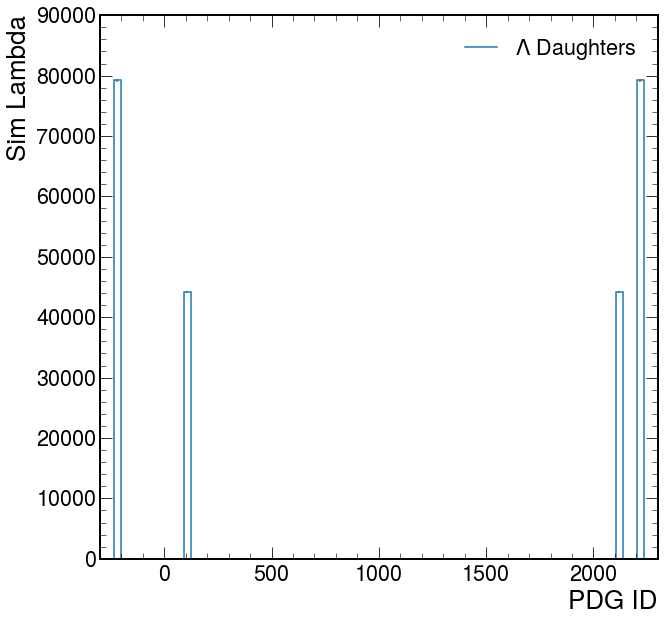

In [12]:
print(hists["lambda_hist_pdg1"])
fig, ax = plt.subplots()
hist.plot1d(hists["lambda_hist_pdg1"]+hists["lambda_hist_pdg2"],ax=ax,clear=False);
leg = ax.legend([r'$\Lambda$ Daughters'])
ax.set_ylim(0, 90000)
ax.set_xlabel('PDG ID')

#protons = 2212
#neutron = 2112
#pion -  = -211
#pion 0  = 111

#decay=1 produces a proton and a pion-
#decay=2 produces a neutron and a pion0

In [ ]:
#protons = 2212
#neutron = 2112
#pion -  = -211
#pion 0  = 111

#decay=1 produces a proton and a pion-
#decay=2 produces a neutron and a pion0